# Advanced ML Workflow V4

## Project description
Bank loan approval dataset where each instance represents data for a unique customer. I'm approaching this task as a **muticlass classification** problem where each customer will be classified as "Good", "Bad", or "Pass", where "Pass" denotes insufficient data to make a firm classification into "Good" or "Bad". Important to note, there is a sigificant difference in the the distribution/count acorss the targets "Good", "Bad", and "Pass", meaning this an **imbalanced dataset**

## Summary of workflow
- **Pre-processing:**
<br> - Initial observations & insights
<br> - Detailed missing value analysis
<br> - Target variable transformation
<br> - Data type conversion
<br> - Binning/discretization
<br> - Outlier detection & removal (artificial)
- **Pre-processing - EDA:**
<br> - Univariate EDA (frequency distributions)
<br> - Multivariate EDA (correlation matrix, scatter plots with/without hue param, stacked/100% stacked bar charts, Chi Squared test)
- **Pre-processing - Imputation Experiment:**
<br> - Categorical imputation experiment (Custom technique vs 'Most frequent')
<br> - Numeric imputation experiment (Zero vs Mean vs Median vs IterativeImputer vs KNNImputer)
- **Pre-processing:**
<br> - Statified split into train & test
- **Pre-processing - Building Pipelines:**
<br> - Build numeric pipeline + variants (Zero/IterativeImputer, StandardScaler/MinMaxScaler)
<br> - Build categorical pipeline (One-Hot-Encoder, Custom imputation)
- **Pre-processing:**
<br> - Feature engineering
<br> - PCA
- **Modeling - Compare Models:**
<br> - Train a variety of classifiers (SDG, SVC, GaussianProcess, GradientBoosting)
<br> - Experiment with a variety of multi-class strategies (inherently multi-class, OvO & OvA)
- **Modeling - Determine Best Model & Appropriate Strategy:**
<br> - Evaluate best model with precision as a priority (GradientBoosting)
<br> - Determine an appropriate strategy based on project description (OvA - "GOOD" vs "not GOOD" with specified cut-off/threshold and a probabilistic classification approach)
- **Modeling - Analyse and Optimise Model:**
<br> - Grid search for hyperparameter tuning
<br> - Compute hard & soft predictions (probabilistic predictions) & decision scores (confidence)
<br> - Cross-validation scores (accuracy, precision) on **training & test** & Cross-validation predictions (hard/soft predictions, decision scores) on **training**
<br> - Determine decision score with appropriate precision-recall tradeoff using the precision-recall curve & apply logic on cross-val predictions for **training**
- **Modeling - Re-Evaluate Performance Pre/Post-Adjustment:**
<br> - Re-evaluate performance using the same methods
- **Modeling - Feature Importance:**
<br> - Determine the most predictive/important features in GradientBossting classifier

## Import initial packages
- Will continue to import more packages when necessary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset

In [2]:
df = pd.read_csv('/Users/willtollan/P2data2799.csv')

## Initial observations
- Fairly small dataset, only 26 columns by 9289
- **Lots of object types**, even for features that should be numeric. This is because there's a significantly high proportion of `.` values, acting as placeholders
- These placeholder values are likely indicating missing data, and therefore these values will be **treated as missing values** for this workflow
- Besides the missing values indicated by `.` value, only the feature `res_indicator` contains `np.nan` missing values

In [3]:
print(df.shape)
print(df.info())
df.head()

(9289, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9289 entries, 0 to 9288
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   app_id         9289 non-null   int64  
 1   GOOD           9289 non-null   object 
 2   BAD            9289 non-null   object 
 3   app_date       9289 non-null   object 
 4   disp_income    9289 non-null   int64  
 5   occ_code       9289 non-null   object 
 6   cust_age       9289 non-null   int64  
 7   time_emp       9289 non-null   object 
 8   res_indicator  8625 non-null   object 
 9   I_01           9289 non-null   object 
 10  I_02           9289 non-null   object 
 11  I_03           9289 non-null   object 
 12  I_04           9289 non-null   object 
 13  D_01           9289 non-null   object 
 14  ER_01          9289 non-null   object 
 15  ER_02          9289 non-null   object 
 16  I_05           9289 non-null   object 
 17  D_02           9289 non-null   object 
 1

,app_id,GOOD,BAD,app_date,disp_income,occ_code,cust_age,time_emp,res_indicator,I_01,...,I_05,D_02,I_06,P_01,S_01,CA_03,CA_02,CA_01,S_02,app_date.1
0,-24,.,.,22-Apr-20,0,SB,19,1,NaN,1,...,13,250,0.000000,.,.,0,0,3,-1,12/2/2035
1,-10,.,.,22-Apr-20,0,SO,29,2,R,1,...,.,.,0.007529,68.859375,1,0,0,3,1,12/2/2035
2,1,0,1,22-Apr-20,0,SO,20,1,P,1,...,10,.,0.023685,56.6484375,1,2,647,3,3,12/2/2035
3,-15,.,.,22-Apr-20,0,SO,16,0,P,.,...,.,.,0.208693,65.328125,.,0,.,5,-1,12/2/2035
4,-19,.,.,22-Apr-20,600,SE,18,0,P,.,...,.,.,0.545007,51.234375,1,1,37,3,2,12/2/2035


In [4]:
# For each column, print the unique values, unique value count, and value counts
for series in df:
    print(f"\033[1m{series}\033[0m:\n")
    
    num_unique_values = df[series].nunique()
    print(f"Unique value count: {num_unique_values}\n")
    
    unique_values = df[series].unique()
    print(f"Unique values: \n{unique_values}\n")    
    
    value_counts = df[series].value_counts()
    print(f"Value count distribution: {value_counts}\n\n\n\n\n")

app_id:

Unique value count: 9289

Unique values: 
[   -24    -10      1 ... -14943 -14933 -14938]

Value count distribution: app_id
-24       1
 10196    1
 10277    1
-10290    1
 10286    1
         ..
-4778     1
-5128     1
-5153     1
 4863     1
-14938    1
Name: count, Length: 9289, dtype: int64





GOOD:

Unique value count: 3

Unique values: 
['.' '0' '1']

Value count distribution: GOOD
.    3912
1    3508
0    1869
Name: count, dtype: int64





BAD:

Unique value count: 3

Unique values: 
['.' '1' '0']

Value count distribution: BAD
.    3912
0    3508
1    1869
Name: count, dtype: int64





app_date:

Unique value count: 244

Unique values: 
['22-Apr-20' '23-Apr-20' '26-Apr-20' '27-Apr-20' '28-Apr-20' '29-Apr-20'
 '30-Apr-20' '4-May-20' '5-May-20' '6-May-20' '7-May-20' '10-May-20'
 '11-May-20' '12-May-20' '14-May-20' '17-May-20' '18-May-20' '19-May-20'
 '20-May-20' '21-May-20' '23-May-20' '24-May-20' '25-May-20' '26-May-20'
 '27-May-20' '30-May-20' '31-May-20' '1-Jun-20

## Treat `.` as missing values for features
- Replace with `NaN`
- Identify all features with missing values

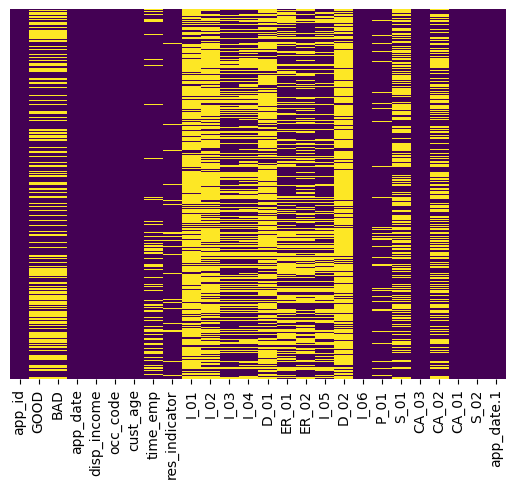

In [5]:
# Distribution of missing data across variables (treating '.' as missing value/NaN)
df = df.replace('.', np.nan)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [6]:
# Count of missing values
df.isnull().sum()

app_id              0
GOOD             3912
BAD              3912
app_date            0
disp_income         0
occ_code            0
cust_age            0
time_emp         1648
res_indicator     664
I_01             7465
I_02             7015
I_03             3451
I_04             4227
D_01             6641
ER_01            3859
ER_02            3971
I_05             3279
D_02             8026
I_06                0
P_01              707
S_01             4708
CA_03               0
CA_02            4500
CA_01               0
S_02                0
app_date.1          0
dtype: int64

In [7]:
# Show proportion of missing values across all variables that have them
for series in df:
    if df[series].isnull().any():
        total_count = len(df[series])
        null_count = df[series].isnull().sum()
        percentage = (null_count / total_count) * 100
        print(f'Percentage of null values for {series} is: {percentage:.2f}%')

Percentage of null values for GOOD is: 42.11%
Percentage of null values for BAD is: 42.11%
Percentage of null values for time_emp is: 17.74%
Percentage of null values for res_indicator is: 7.15%
Percentage of null values for I_01 is: 80.36%
Percentage of null values for I_02 is: 75.52%
Percentage of null values for I_03 is: 37.15%
Percentage of null values for I_04 is: 45.51%
Percentage of null values for D_01 is: 71.49%
Percentage of null values for ER_01 is: 41.54%
Percentage of null values for ER_02 is: 42.75%
Percentage of null values for I_05 is: 35.30%
Percentage of null values for D_02 is: 86.40%
Percentage of null values for P_01 is: 7.61%
Percentage of null values for S_01 is: 50.68%
Percentage of null values for CA_02 is: 48.44%


## Drop features
- Drop features with missing values >70% --> `I_01`(80%), `I_02` (75%), `D_01` (71%), and `D_02` (86%)
- Drop features `app_id` since it's just the applicant index
- Drop features `app_date`, and `app_date.1` since the "Date of Application" is simply irrelevant

In [8]:
df = df.drop('I_01', axis=1)
df = df.drop('I_02', axis=1)
df = df.drop('D_01', axis=1)
df = df.drop('D_02', axis=1)
df = df.drop('app_id', axis=1)
df = df.drop('app_date', axis=1)
df = df.drop('app_date.1', axis=1)

df.columns

Index(['GOOD', 'BAD', 'disp_income', 'occ_code', 'cust_age', 'time_emp',
       'res_indicator', 'I_03', 'I_04', 'ER_01', 'ER_02', 'I_05', 'I_06',
       'P_01', 'S_01', 'CA_03', 'CA_02', 'CA_01', 'S_02'],
      dtype='object')

## Target variable transformation
- Use the missing values in `GOOD` and `BAD` binary classes to create a third class called `PASS`
- Binary classification problem now transformed into a 3-class **multiclass classification** problem with an imbalanced  distribution across the 3 classes

In [9]:
df['GOOD'] = pd.to_numeric(df['GOOD'])
df['BAD'] = pd.to_numeric(df['BAD'])

In [10]:
df.head()

,GOOD,BAD,disp_income,occ_code,cust_age,time_emp,res_indicator,I_03,I_04,ER_01,ER_02,I_05,I_06,P_01,S_01,CA_03,CA_02,CA_01,S_02
0,NaN,NaN,0,SB,19,1,NaN,5,1,3,1,13,0.000000,NaN,NaN,0,0,3,-1
1,NaN,NaN,0,SO,29,2,R,5,1,NaN,NaN,NaN,0.007529,68.859375,1,0,0,3,1
2,0.0,1.0,0,SO,20,1,P,5,2,11,1,10,0.023685,56.6484375,1,2,647,3,3
3,NaN,NaN,0,SO,16,0,P,NaN,NaN,NaN,NaN,NaN,0.208693,65.328125,NaN,0,NaN,5,-1
4,NaN,NaN,600,SE,18,0,P,11,1,NaN,0,NaN,0.545007,51.234375,1,1,37,3,2


In [11]:
# Use missing data in GOOD and BAD columns to generate third class: PASS
df['PASS'] = np.where((df['GOOD'].isnull()) & (df['BAD'].isnull()), 1.0, 0.0)
df.insert(2, 'PASS', df.pop('PASS'))
df.head()

,GOOD,BAD,PASS,disp_income,occ_code,cust_age,time_emp,res_indicator,I_03,I_04,ER_01,ER_02,I_05,I_06,P_01,S_01,CA_03,CA_02,CA_01,S_02
0,NaN,NaN,1.0,0,SB,19,1,NaN,5,1,3,1,13,0.000000,NaN,NaN,0,0,3,-1
1,NaN,NaN,1.0,0,SO,29,2,R,5,1,NaN,NaN,NaN,0.007529,68.859375,1,0,0,3,1
2,0.0,1.0,0.0,0,SO,20,1,P,5,2,11,1,10,0.023685,56.6484375,1,2,647,3,3
3,NaN,NaN,1.0,0,SO,16,0,P,NaN,NaN,NaN,NaN,NaN,0.208693,65.328125,NaN,0,NaN,5,-1
4,NaN,NaN,1.0,600,SE,18,0,P,11,1,NaN,0,NaN,0.545007,51.234375,1,1,37,3,2


In [12]:
# Replace NaN as 0.0 for GOOD/BAD class labels
# Now each row is associated with only 1 label from either GOOD, BAD, PASS
df['GOOD'] = df['GOOD'].replace(np.nan, 0.0)
df['BAD'] = df['BAD'].replace(np.nan, 0.0)
df.head()

,GOOD,BAD,PASS,disp_income,occ_code,cust_age,time_emp,res_indicator,I_03,I_04,ER_01,ER_02,I_05,I_06,P_01,S_01,CA_03,CA_02,CA_01,S_02
0,0.0,0.0,1.0,0,SB,19,1,NaN,5,1,3,1,13,0.000000,NaN,NaN,0,0,3,-1
1,0.0,0.0,1.0,0,SO,29,2,R,5,1,NaN,NaN,NaN,0.007529,68.859375,1,0,0,3,1
2,0.0,1.0,0.0,0,SO,20,1,P,5,2,11,1,10,0.023685,56.6484375,1,2,647,3,3
3,0.0,0.0,1.0,0,SO,16,0,P,NaN,NaN,NaN,NaN,NaN,0.208693,65.328125,NaN,0,NaN,5,-1
4,0.0,0.0,1.0,600,SE,18,0,P,11,1,NaN,0,NaN,0.545007,51.234375,1,1,37,3,2


In [13]:
# Sanity checking - sum of positive classes equals 9289 as it should
totalP = df['GOOD'].value_counts()[1.0]+df['BAD'].value_counts()[1.0]+df['PASS'].value_counts()[1.0]
print('Sum of positive labels: ', totalP)

Sum of positive labels:  9289


In [14]:
# Checking value distribution for each class label --> imbalanced dataset
print('Positive values for GOOD is: ', df['GOOD'].value_counts()[1.0], '(', 
      '{:.2f}'.format(df['GOOD'].value_counts()[1.0]/9289*100), '% of total)')

print('Positive values for BAD is: ', df['BAD'].value_counts()[1.0], '(', 
      '{:.2f}'.format(df['BAD'].value_counts()[1.0]/9289*100), '% of total)')

print('Positive values for PASS is: ', df['PASS'].value_counts()[1.0], '(', 
      '{:.2f}'.format(df['PASS'].value_counts()[1.0]/9289*100), '% of total)')

Positive values for GOOD is:  3508 ( 37.77 % of total)
Positive values for BAD is:  1869 ( 20.12 % of total)
Positive values for PASS is:  3912 ( 42.11 % of total)


## Convert data types I
### Convert "should be" numeric features to numeric
- Convert "should be"/inherently numeric features, currently stored as objects, to numeric data type
- This includes: `time_emp`, `I_03`, `I_04`, `ER_01`, `ER_02`, `I_05`, `P_01`, `S_01`, `CA_02`

In [15]:
df.select_dtypes(include=['float64']).columns

Index(['GOOD', 'BAD', 'PASS', 'I_06'], dtype='object')

In [16]:
cols = ['time_emp', 'I_03', 'I_04', 'ER_01', 'ER_02', 'I_05', 'P_01', 'S_01', 'CA_02']
for col in cols:
    df[col] = df[col].astype('float64')
    
df.select_dtypes(include=['float64']).columns

Index(['GOOD', 'BAD', 'PASS', 'time_emp', 'I_03', 'I_04', 'ER_01', 'ER_02',
       'I_05', 'I_06', 'P_01', 'S_01', 'CA_02'],
      dtype='object')

## Convert data types II
### Convert "should be" categorical features to object
- Convert "should be"/inherently categorical features, currently stored as numeric, to object data type
- `CA_01`: *"Applicant - Worst status of all current accounts in the last 6 months"* 
<br> This is a categorical variable where the **values 1-5 represent a category** - therefore it must be handled as a category, and the first step is to convert it to an object data type
- `S_02`: *"Applicant - Minimum number of months since credit search last 12 months"*
<br> This feature contains the value `-1` at a high proportion of 54% - likely representing applicants that **have not had a credit search in the last 12 months** (given 50% of applicants are under 19 years old, this is very likely the case). Also, given 50% of the data is missing in feature `S_01` which only contains positive numbers, and where this value is not available, unlike `S_02`. Therefore this will be transformed into a binary categorical variable containing the value: "Y - credit search LTM" or "N - credit search LTM"

### Feature `CA_01`

In [17]:
df['CA_01'].dtypes

dtype('int64')

In [18]:
# Convert feature CA_01 to object
df['CA_01'] = df['CA_01'].astype('object')
df['CA_01'].dtypes

dtype('O')

### Feature `S_02`

In [19]:
df['S_02'].dtypes

dtype('int64')

In [20]:
# High proportion of value '-1' (no credit search in last 12 months)
df['S_02'].value_counts()[-1] / len(df['S_02'])

0.5396705781031328

In [21]:
df['S_02'].value_counts()

S_02
-1    5013
 0    1795
 1    1354
 2     535
 3     354
 4     238
Name: count, dtype: int64

In [22]:
# Re-map and replace values in 'S_02'
value_map = {0: 'Y - credit search LTM', 1: 'Y - credit search LTM', 2: 'Y - credit search LTM', 
             3: 'Y - credit search LTM', 4: 'Y - credit search LTM', -1: 'N - credit search LTM'}

df['S_02'] = df['S_02'].replace(value_map)

In [23]:
df['S_02'].value_counts()

S_02
N - credit search LTM    5013
Y - credit search LTM    4276
Name: count, dtype: int64

In [24]:
df.select_dtypes(include='object').head()

,occ_code,res_indicator,CA_01,S_02
0,SB,NaN,3,N - credit search LTM
1,SO,R,3,Y - credit search LTM
2,SO,P,3,Y - credit search LTM
3,SO,P,5,N - credit search LTM
4,SE,P,3,Y - credit search LTM


## Drop feature `S_01`
### Justification
- Variable `S_01` meaning *"applicant's number of credit searches in the last 3 months"* is closely linked to variable `S_02` meaning *"Minimum number of months since credit search last 12 months"*
- Variable `S_01` contains 50% missing values because there is no value corresponding to *no credit search in last 3 months*, meaning half the sample population could not provide an response. This is the same 50% that responded `-1` in the variable `S_02` indicating *no credit search in last 12 months*
- Consequentially, I will drop feature `S_01` as it is now redundant, has 50% missing values, and the feature `S_02` (now transformed into a binary categorical variable) captures the essentially the same data in a binary fashion

In [25]:
df = df.drop('S_01', axis=1)

## Handle artificial outliers
### Detect outliers
- Detect outliers using **IQR approach** - given all numeric features except `P_01`, and `ER_02` have a **right-skewed** distribution, the IQR method is a better choice than the Z-score method for outlier detection
### Natural outliers
- Natural outliers will be **left alone** as they represent natural variation in the sample population
### Artificial outliers
- However, artificial outliers will be **removed** as they a result of errors in measurement, bad data collection and placeholders
- `time_emp` contains the value `99999.0` which is an obvious artificial outlier given it would be impossible to be employed this many years
- `cust_age` contains the values `11`, `12`, `14`, `15`, `16`, and `17`, all of which are under the UK minimum loan application age - additionally, we know this is a UK-based bank as it's registered as a plc.

### Detect outliers

In [26]:
# Create function to determine outliers using the IQR approach
def detect_outliers_iqr(column):

    # Compute Q1, Q3, and IQR
    percentile75 = column.quantile(0.75)
    percentile25 = column.quantile(0.25)
    IQR = percentile75 - percentile25
    
    # Set upper/lower limit thresholds
    upper_limit = percentile75 + 1.5 * IQR
    lower_limit = percentile25 - 1.5 * IQR
    
    # Create 2 lists, 1 for upper outliers, and 1 for lower outliers
    upper_outliers = sorted(column[column > upper_limit].tolist())
    upper_outliers = list(dict.fromkeys(upper_outliers))
    
    lower_outliers = sorted(column[column < lower_limit].tolist())
    lower_outliers = list(dict.fromkeys(lower_outliers))
    
    # Total up outliers
    total_outliers = len(upper_outliers + lower_outliers)
    
    print('\033[1mVariable:\033[0m', column.name)
    print('\n\033[1mTotal outliers:\033[0m ', total_outliers,)
    print('\033[1mUpper outlier values:\033[0m ', upper_outliers)
    print('\033[1mLower outlier values:\033[0m ', lower_outliers, '\n\n')

In [27]:
# Create function to compute feature skewness
def skewness(column):
    skew = round(column.skew(), 2)
    if -0.5 < skew < 0.5:
        print(f'With a skew value of {skew}, distribution is \033[1mapproximately symmetric\033[0m')
    elif 0.5 < skew < 1:
        print(f'With a skew value of {skew}, distribution is \033[1mmoderately right/positively skewed\033[0m')
    elif skew > 1:
        print(f'With a skew value of {skew}, distribution is \033[1mvery right/positively skewed\033[0m')
    elif -1 < skew < -0.5:
        print(f'With a skew value of {skew}, distribution is \033[1mmoderately left/negatively symmetric\033[0m')
    elif skew < -1:
        print(f'With a skew value of {skew}, distribution is \033[1mvery left/negatively symmetric\033[0m')

In [28]:
# Input all float64 features into outlier detection function
for column in df.select_dtypes('float64'):
    detect_outliers_iqr(df[column])

Variable: GOOD

Total outliers:  0
Upper outlier values:  []
Lower outlier values:  [] 


Variable: BAD

Total outliers:  1
Upper outlier values:  [1.0]
Lower outlier values:  [] 


Variable: PASS

Total outliers:  0
Upper outlier values:  []
Lower outlier values:  [] 


Variable: time_emp

Total outliers:  5
Upper outlier values:  [3.0, 4.0, 5.0, 6.0, 99999.0]
Lower outlier values:  [] 


Variable: I_03

Total outliers:  59
Upper outlier values:  [46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 80.0, 81.0, 82.0, 83.0, 86.0, 87.0, 88.0, 89.0, 90.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 108.0, 109.0, 112.0, 138.0]
Lower outlier values:  [] 


Variable: I_04

Total outliers:  17
Upper outlier values:  [4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 16.0, 17.0, 18.0, 19.0, 20.0, 22.0, 24.

In [29]:
# Input all float64 features into outlier detection function
for column in df.select_dtypes('int64'):
    detect_outliers_iqr(df[column])

Variable: disp_income

Total outliers:  117
Upper outlier values:  [3, 5, 10, 11, 16, 20, 21, 24, 25, 30, 31, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 1020, 1040, 1060, 1080, 1100, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1300, 1320, 1340, 1360, 1380, 1400, 1440, 1460, 1480, 1500, 1520, 1540, 1560, 1580, 1600, 1640, 1660, 1680, 1700, 1720, 1740, 1760, 1800, 1900, 2000, 2160, 2180, 2200, 2280, 2340, 2400, 2500, 2700, 2820, 3000, 3620, 4000, 5000, 5800, 6040, 7000, 12000, 13000, 24000, 85260]
Lower outlier values:  [] 


Variable: cust_age

Total outliers:  33
Upper outlier values:  [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 58, 61, 75, 88, 122]
Lower outlier values:  [11] 


Variable: CA_03

Total outliers:  7
Upper outlie

In [60]:
def boxplot(column):
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    
    # Plot a boxplot on the first subplot
    sns.boxplot(x=column, orient='h', ax=ax[0])
    ax[0].set_title(f'{column.name} boxplot')
    
    # Plot a histogram on the second subplot
    sns.histplot(x=column, kde=True, ax=ax[1])
    ax[1].set_title(f'{column.name} histogram')
    
    plt.show()
    
    # Print skewness - call function
    skewness(column)
    print('\n')
    
    # Print outliers - calling function
    detect_outliers_iqr(column)

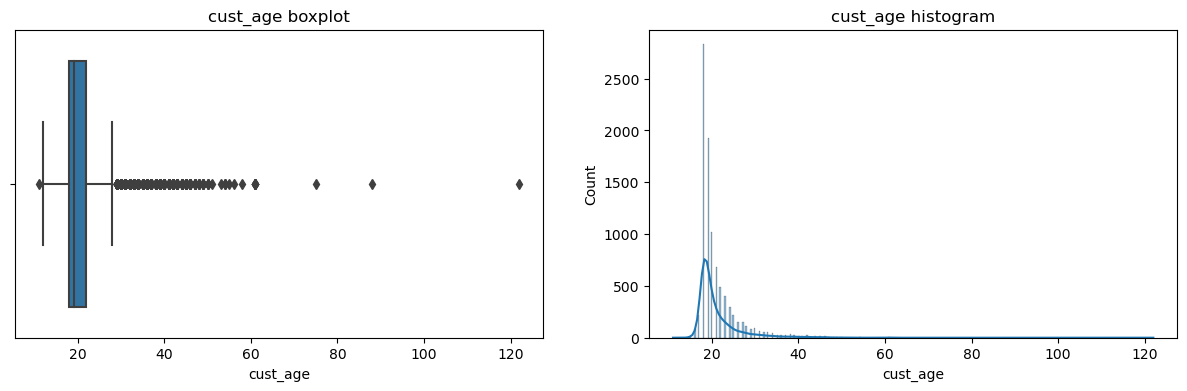

With a skew value of 3.71, distribution is very right/positively skewed


Variable: cust_age

Total outliers:  33
Upper outlier values:  [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 58, 61, 75, 88, 122]
Lower outlier values:  [11] 




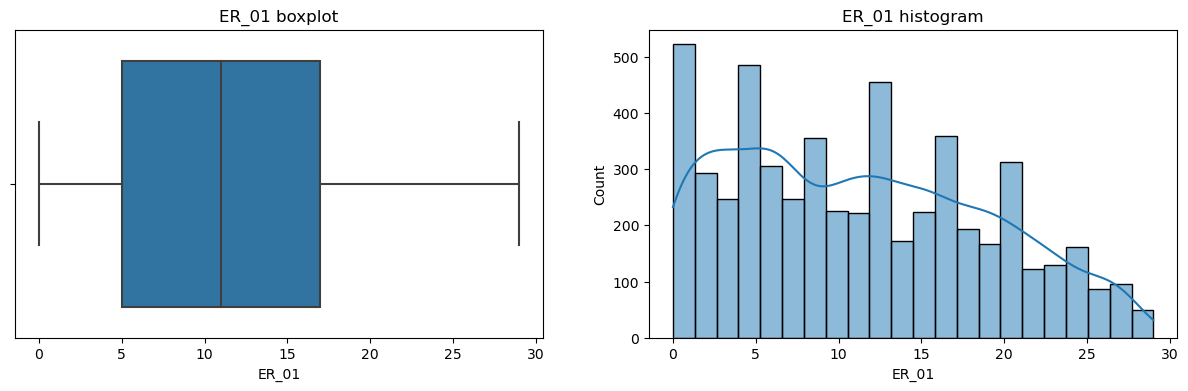

With a skew value of 0.32, distribution is approximately symmetric


Variable: ER_01

Total outliers:  0
Upper outlier values:  []
Lower outlier values:  [] 




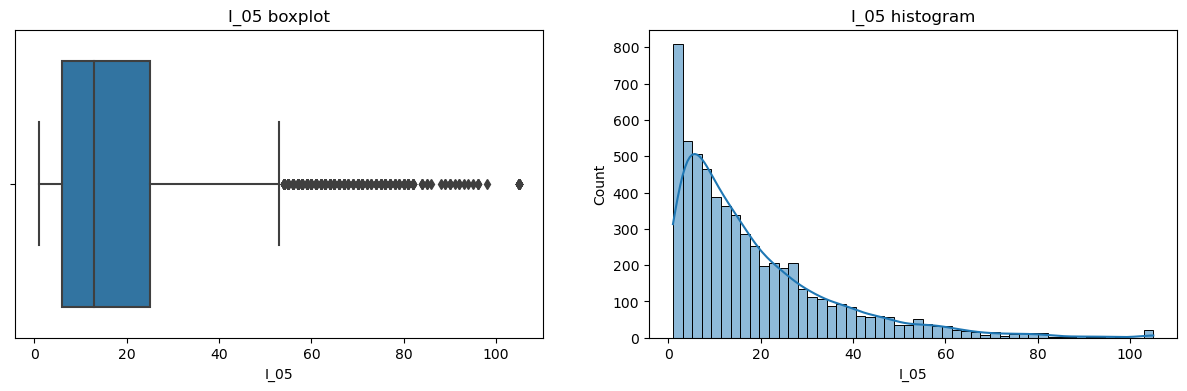

With a skew value of 1.77, distribution is very right/positively skewed


Variable: I_05

Total outliers:  43
Upper outlier values:  [54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 84.0, 85.0, 86.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 98.0, 105.0]
Lower outlier values:  [] 




In [61]:
ls = ['cust_age', 'ER_01', 'I_05']
for i in ls:
    boxplot(df[i])

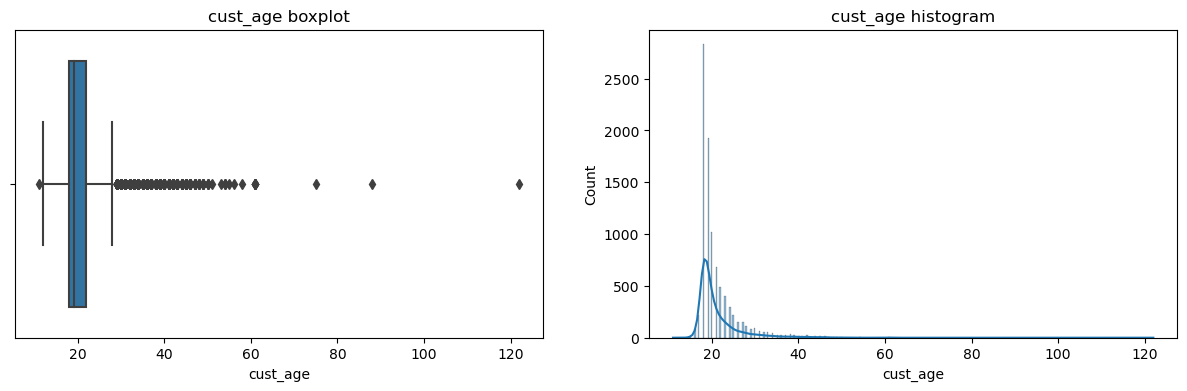

With a skew value of 3.71, distribution is very right/positively skewed


Variable: cust_age

Total outliers:  33
Upper outlier values:  [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 58, 61, 75, 88, 122]
Lower outlier values:  [11] 


Artificial outliers (to be imputed): 11, 12, 14, 15, 16, 17
Minimum age for UK bank loan applications is 18 years old, and this bank is a plc based in the UK


In [32]:
# cust_age - customer age

# Some artificial outliers --> cust_age<18 are artificial outliers since minimum UK loan application age is 18 y/o
# Lots of natural outliers --> leave them alone as they represent natural variation

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Plot a boxplot on the first subplot
sns.boxplot(x=df['cust_age'], orient='h', ax=ax[0])
ax[0].set_title('cust_age boxplot')

# Plot a histogram on the second subplot
sns.histplot(x=df['cust_age'], kde=True, ax=ax[1])
ax[1].set_title('cust_age histogram')

plt.show()

# Print skewness - calling function
skewness(df['cust_age'])
print('\n')

# Print outliers - calling function
detect_outliers_iqr(df['cust_age'])

# Callout artificial outliers
print('\033[1mArtificial outliers\033[0m (to be imputed): 11, 12, 14, 15, 16, 17')
print('Minimum age for UK bank loan applications is 18 years old, and this bank is a plc based in the UK')

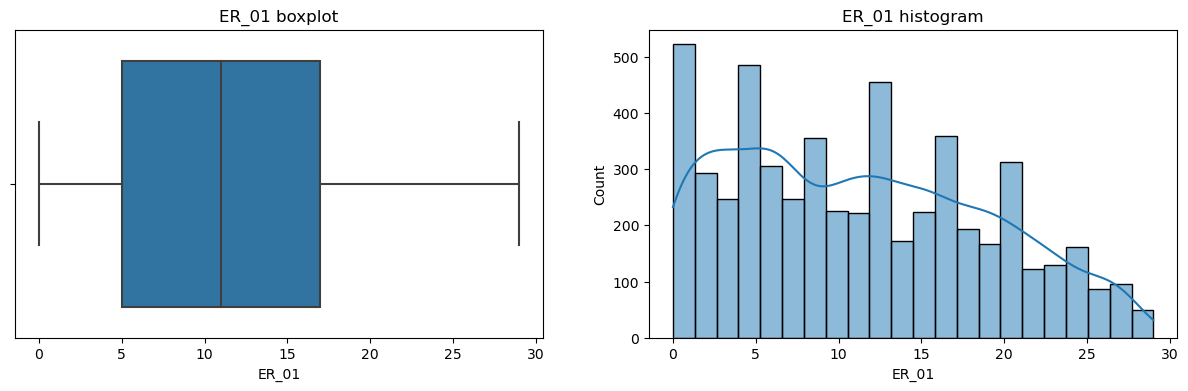

With a skew value of 0.32, distribution is approximately symmetric


Variable: ER_01

Total outliers:  0
Upper outlier values:  []
Lower outlier values:  [] 




In [33]:
# ER_01 - Household - Length of residence at current address

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Plot a boxplot on the first subplot
sns.boxplot(x=df['ER_01'], orient='h', ax=ax[0])
ax[0].set_title('ER_01 boxplot')

# Plot a histogram on the second subplot
sns.histplot(x=df['ER_01'], kde=True, ax=ax[1])
ax[1].set_title('ER_01 histogram')

plt.show()

# Print skewness - callling function
skewness(df['ER_01'])
print('\n')

# Print outliers - calling function
detect_outliers_iqr(df['ER_01'])

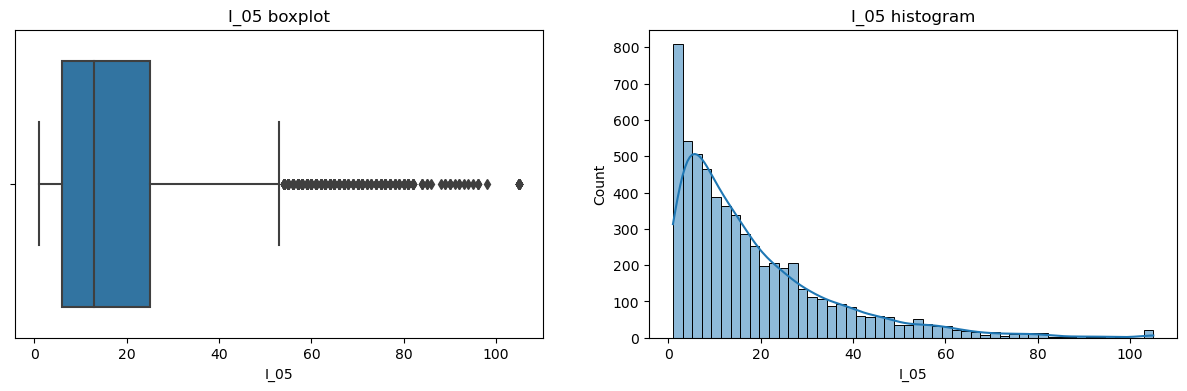

With a skew value of 1.77, distribution is very right/positively skewed


Variable: I_05

Total outliers:  43
Upper outlier values:  [54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 84.0, 85.0, 86.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 98.0, 105.0]
Lower outlier values:  [] 




In [34]:
# I_05 - Household - Total number of accounts (including loans, cards, telecoms, etc)

# Lots of natural outliers --> leave them alone in first workflow
# No artificial outliers (I have checked all unique values)

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Plot a boxplot on the first subplot
sns.boxplot(x=df['I_05'], orient='h', ax=ax[0])
ax[0].set_title('I_05 boxplot')

# Plot a histogram on the second subplot
sns.histplot(x=df['I_05'], kde=True, ax=ax[1])
ax[1].set_title('I_05 histogram')

plt.show()

# Print skewness - callling function
skewness(df['I_05'])
print('\n')

# Print outliers - calling function
detect_outliers_iqr(df['I_05'])

### Handle artificial outliers: `time_emp`

In [62]:
df['time_emp'].value_counts()

time_emp
1.0        3959
0.0        2473
2.0         671
3.0         259
4.0         151
5.0          69
99999.0      32
6.0          27
Name: count, dtype: int64

In [63]:
# Call outlier detection function - input 'time_emp'
detect_outliers_iqr(df['time_emp'])

Variable: time_emp

Total outliers:  5
Upper outlier values:  [3.0, 4.0, 5.0, 6.0, 99999.0]
Lower outlier values:  [] 




In [64]:
# Count of'99999.0' re-allocated to value '1.1' (i.e. median value)
df['time_emp'] = df['time_emp'].replace(99999.0, df['time_emp'].median())
df['time_emp'].value_counts()

time_emp
1.0    3991
0.0    2473
2.0     671
3.0     259
4.0     151
5.0      69
6.0      27
Name: count, dtype: int64

### Handle artificial outliers: `cust_age`

In [65]:
# Identify ages under 18 years old: 11, 12, 14, 15, 16, and 17
df['cust_age'].unique()

array([ 19,  29,  20,  16,  18,  25,  22,  21,  26,  45,  30,  24,  38,
        17,  23,  46,  28,  34,  32,  31,  40,  36,  27,  33,  44,  43,
        42,  50,  49,  37,  39,  35,  47,  58,  41,  48,  15,  55,  54,
        88,  14,  53,  56,  61,  75,  51,  11,  12, 122])

In [66]:
# Replace ages < 18 with 18 (as logically the their attributes should be the most similar)

value_map = {11: 18, 12: 18, 14: 18, 15: 18, 16: 18, 17: 18}
df['cust_age'] = df['cust_age'].replace(value_map)

df['cust_age'].unique()

array([ 19,  29,  20,  18,  25,  22,  21,  26,  45,  30,  24,  38,  23,
        46,  28,  34,  32,  31,  40,  36,  27,  33,  44,  43,  42,  50,
        49,  37,  39,  35,  47,  58,  41,  48,  55,  54,  88,  53,  56,
        61,  75,  51, 122])

## Univariate/multivariate EDA
### Approach to EDA
- Will conduct Univariate and Multivariate EDA across all numeric and categorical features
- Given the X data is very sparse, the analysis and insights gained from EDA, especially in terms of frequency distributions and variable correlations/relationships, will help guide on an **appropriate imputation strategy** to perform on missing numeric and categorical data
- Generate multiple subsets containing different combinations of features to experiment and apply different types of data transformations and data analysis

#### Subset 1
- Univariate distributions
- Correlation matrix 
- This will include continuous + discrete features
#### Subset 2
- Multiple scatter plots using `sns.pairplot`
- Regression plots
- This will include continuous + discrete features
#### Subset 3
- Multiple scatter plots using `sns.pairplot` with color representing the target labels
- This will include continuous + discrete features, and our class labels as an extra dimension for the scatter plots
- For the ease of plotting, specifically to satisfy the `hue` parameter, I consolidated the values across `GOOD`, `BAD`, and `PASS` classes into a single column labelled `CLASSES`
#### Subset 4 
- Multiple scatter plots using `sns.pairplot` with color representing the categorical feature `res_indicator`
- This will include continuous + discrete features, and categorical feature `res_indicator` as an extra dimension for the scatter plots
#### Subset 5
- Visualising the % breakdown of the distribution of both numeric/categorical variables by categorical variables using 100% stacked bar charts
- Color is used to represent the % breakdown by category label, i.e. `GOOD`, `BAD`, `PASS`, `res_indicator`, `occ_code`, and `CA_01`
- For the ease of plotting, specifically to satisfy the `hue` parameter, I consolidated the values across `GOOD`, `BAD`, and `PASS` classes into a single column labelled `CLASSES`
- Conducted Chi Squared test of independence across all categorical features. As an addition, I bucketed the values in the feature `cust_age`, converting in into a categorical feature to be used in the Chi Squared test

## Subset 1
- Univariate distributions
- Correlation matrix 

In [67]:
subset = df[['GOOD', 'BAD', 'PASS', 'disp_income', 'cust_age', 'time_emp', 'I_03', 'I_04', 'I_05', 'I_06', 'ER_01', 
             'ER_02', 'P_01', 'CA_03', 'CA_02']]
subset.columns

Index(['GOOD', 'BAD', 'PASS', 'disp_income', 'cust_age', 'time_emp', 'I_03',
       'I_04', 'I_05', 'I_06', 'ER_01', 'ER_02', 'P_01', 'CA_03', 'CA_02'],
      dtype='object')

In [68]:
print(subset['I_04'].value_counts())
print(subset['I_04'].unique())

I_04
1.0     3211
2.0     1206
3.0      408
4.0      146
5.0       60
6.0        7
10.0       5
13.0       3
8.0        3
12.0       2
18.0       2
17.0       1
16.0       1
11.0       1
20.0       1
9.0        1
22.0       1
14.0       1
19.0       1
24.0       1
Name: count, dtype: int64
[ 1.  2. nan  5.  3. 13.  4.  6. 12. 10. 19.  9.  8. 18. 14. 22. 17. 20.
 11. 16. 24.]


In [69]:
subset_no_nan = subset[(subset['I_04'].notnull())]

In [70]:
subset_no_nan.head(50)

,GOOD,BAD,PASS,disp_income,cust_age,time_emp,I_03,I_04,I_05,I_06,ER_01,ER_02,P_01,CA_03,CA_02
0,0.0,0.0,1.0,0,19,1.0,5.0,1.0,13.0,0.000000,3.0,1.0,NaN,0,0.0
1,0.0,0.0,1.0,0,29,2.0,5.0,1.0,NaN,0.007529,NaN,NaN,68.859375,0,0.0
2,0.0,1.0,0.0,0,20,1.0,5.0,2.0,10.0,0.023685,11.0,1.0,56.648438,2,647.0
4,0.0,0.0,1.0,600,18,0.0,11.0,1.0,NaN,0.545007,NaN,0.0,51.234375,1,37.0
7,0.0,1.0,0.0,0,19,0.0,2.0,1.0,NaN,0.189608,0.0,NaN,51.750000,0,0.0
9,0.0,0.0,1.0,0,20,1.0,24.0,5.0,19.0,0.226874,12.0,6.0,57.515625,4,290.0
10,0.0,1.0,0.0,400,20,0.0,10.0,2.0,17.0,0.258482,6.0,3.0,47.718750,1,0.0
13,0.0,1.0,0.0,0,19,0.0,3.0,2.0,NaN,0.018332,NaN,NaN,9.406250,1,0.0
14,0.0,0.0,1.0,0,21,1.0,20.0,2.0,NaN,0.523693,NaN,3.0,42.679688,1,363.0
15,1.0,0.0,0.0,0,26,1.0,15.0,1.0,NaN,0.000000,NaN,0.0,NaN,0,0.0


### 
- All 100% of missing values in `I_04` (n=4227) correspond to: 
<br> 99% of total missing values in `I_03`
<br> 93% of total missing values in `CA_03`
<br> 90% of 0.0 values in `CA_03`
- Since all the values for `CA_03` are 0.0, this means 

In [71]:
subset_nan = subset[subset['I_04'].isnull()]
len(subset_nan)

4227

In [72]:
# 3449 / 3451 (99%) of NaN values in I_03 are tied/linked to NaN values in I_04

print(subset_nan['I_03'].isnull().sum())

3449


In [73]:
subset_nan['I_03'].unique()

array([ nan,  33.,   4.,  11.,   9.,  17.,  15.,   8.,   1.,  16.,   5.,
        10.,  18.,   2.,  28.,  13.,   6.,  19.,  23.,  75.,  20.,  25.,
        34.,  37.,   3.,  38.,  14.,   7.,  26.,  44.,  21.,  41.,  12.,
        30.,  48.,  42.,  27.,  29.,  22.,  76.,  36.,  31.,  32.,  51.,
        24.,  35.,  43., 108.,  61.,  40.,  77.,  50.,  46.,  45.,  39.,
        49.,  62.,  78.,  56.,  52.,  57., 100.,  65.,  81.])

In [74]:
# 4227 / 4500 (93%) of NaN values in CA_02 are tied/linked to 100% NaN values in I_04

subset_nan['CA_02'].isnull().sum()

4227

In [75]:
# 4227 / 4676 (90%) of 0.0 values in CA_03 are tied/linked to 100% NaN values in I_04

subset_nan['CA_03'].value_counts()

CA_03
0    4227
Name: count, dtype: int64

### Zero-imputation
- All 0.0 values in `CA_03` (n=4676) correspond to:
<br> 4496 out of 4500 (99%) total missing values in `CA_02`
<br> 4227 out of 4227 (100%) of total missing values in `I_04`
<br> 3451 out of 3451 (100%) of total missing values in `I_03`
- Since the 0.0 values for `CA_03` signal that applicant's have no live current accounts, it is reasonable to assume these applicant's will neither have any corresponding value for: `CA_02`, `I_03`, nor `I_04`. Given these 3 variables represent the following:
<br> `CA_02` - Total balance of all live accounts
<br> `I_03` - Age in months of most recently opened account
<br> `I_04` - Total number of accounts (including loans, cards, contracts, etc)
- Therefore a zero-imputation approach will be applied for missing values in `CA_02`, `I_03`, and `I_04`, while other non-related variables with missing values will be treated differently

In [ ]:
subset_CA_03_is_0 = subset[subset['CA_03'] == 0]
len(subset_CA_03_is_0)

In [ ]:
# 100% 0.0 values in CA_03 --> 99% missing values in CA_02

print(subset_CA_03_is_0['CA_02'].isnull().sum())
print(subset_CA_03_is_0['CA_02'].isnull().sum() / df['CA_02'].isnull().sum() * 100)

In [ ]:
# 100% 0.0 values in CA_03 --> 100% missing values in I_04

print(subset_CA_03_is_0['I_04'].isnull().sum())
print(subset_CA_03_is_0['I_04'].isnull().sum() / df['I_04'].isnull().sum() * 100)

In [ ]:
# 100% 0.0 values in CA_03 --> 100% missing values in I_03

print(subset_CA_03_is_0['I_03'].isnull().sum())
print(subset_CA_03_is_0['I_03'].isnull().sum() / df['I_03'].isnull().sum() * 100)

In [ ]:
subset_CA_03_is_0.head(50)

In [ ]:
subset_nan.head(50)

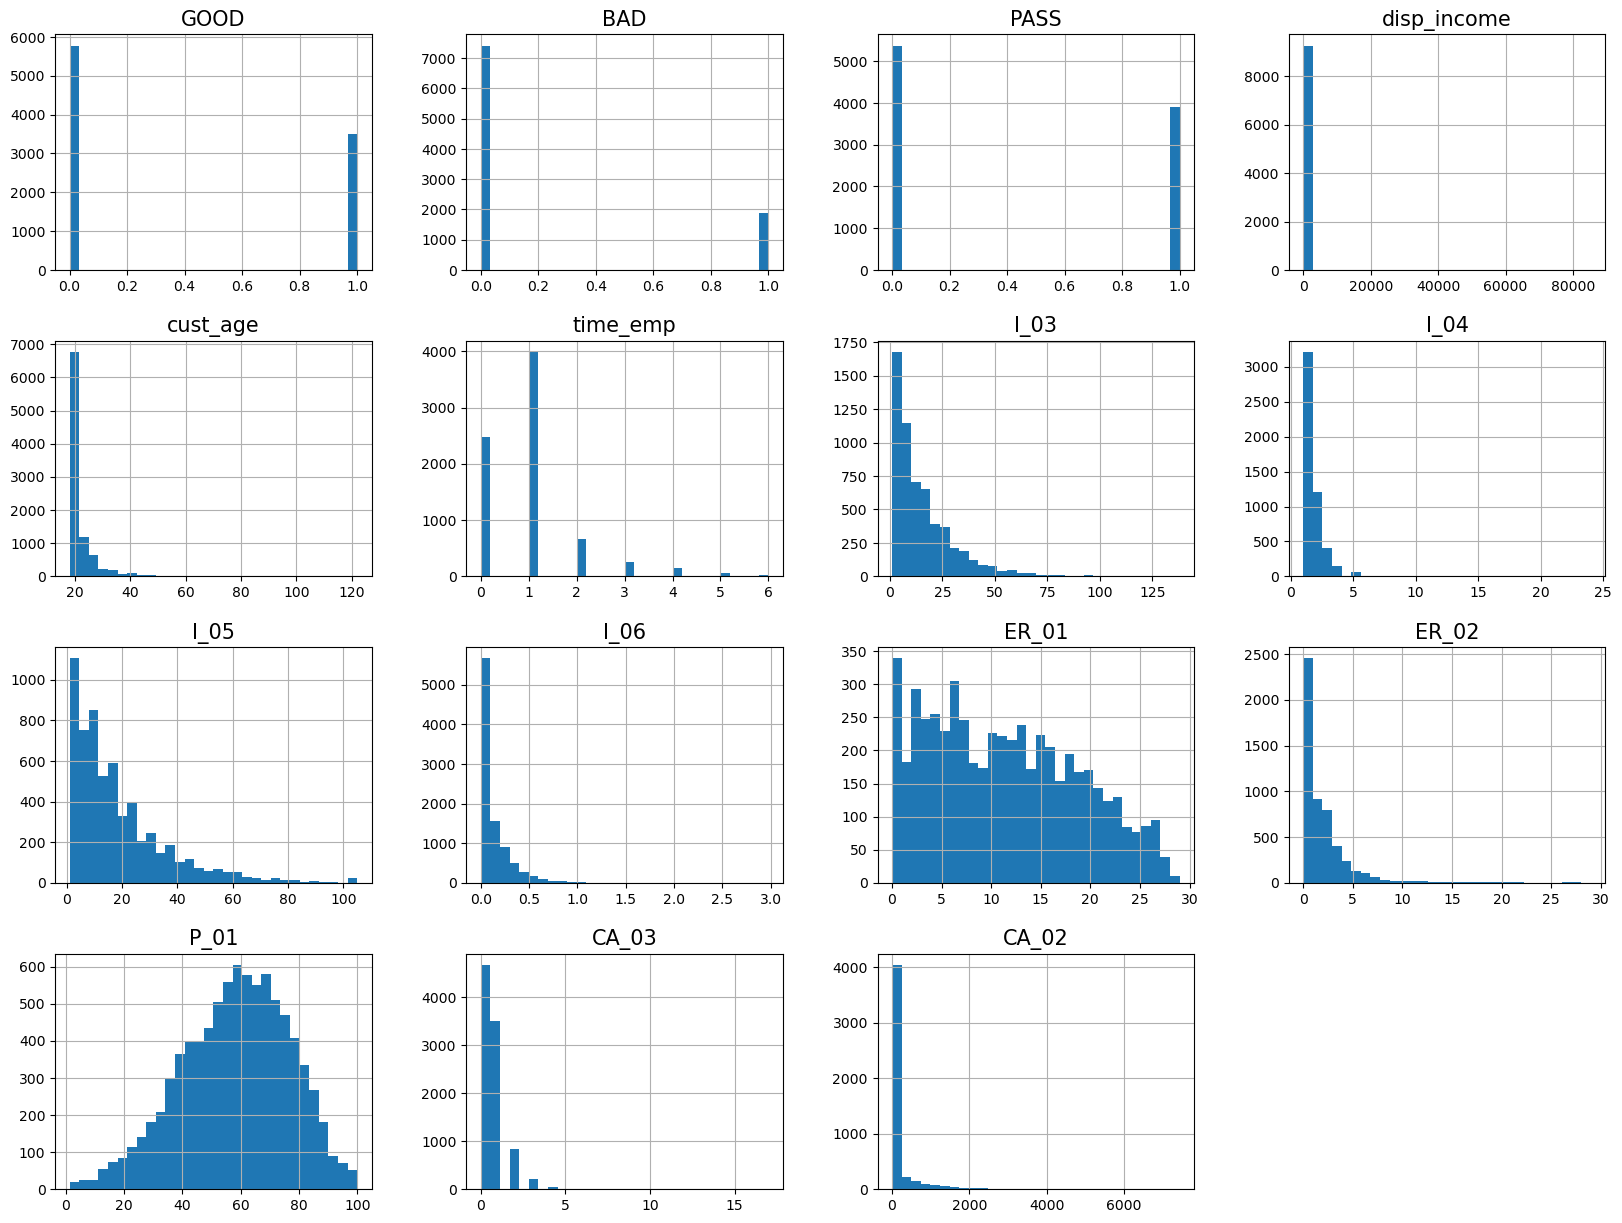

In [76]:
# Most features are right-skewed, ER_01 has a uniform distribution, and P_01 has a Gaussian distribution
plt.rc('font', size=14)
plt.rc('axes', labelsize=8, titlesize=15)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

subset.hist(bins=30, figsize=(20, 15))
plt.show()

In [77]:
# Skewness = (μ - ν) / σ
# -1 to -0.5 (left skewed), 0.5 to 1(right skewed) - slightly skewed
# < -1 (left skewed),  > 1 (right skewed) - highly skewed
for series in subset:
    skew = subset[series].skew()
    print(f'Skewness for {series} is {format(skew, ".2f")}')

Skewness for GOOD is 0.50
Skewness for BAD is 1.49
Skewness for PASS is 0.32
Skewness for disp_income is 70.41
Skewness for cust_age is 3.78
Skewness for time_emp is 1.87
Skewness for I_03 is 2.03
Skewness for I_04 is 6.87
Skewness for I_05 is 1.77
Skewness for I_06 is 2.88
Skewness for ER_01 is 0.32
Skewness for ER_02 is 4.09
Skewness for P_01 is -0.33
Skewness for CA_03 is 2.26
Skewness for CA_02 is 5.93


In [78]:
# Correlation values
corr_matrix = subset.corr()
corr_matrix

,GOOD,BAD,PASS,disp_income,cust_age,time_emp,I_03,I_04,I_05,I_06,ER_01,ER_02,P_01,CA_03,CA_02
GOOD,1.000000,-0.390959,-0.664443,-0.011907,-0.116189,-0.052266,0.036202,-0.120990,0.021549,-0.125357,0.090617,-0.067905,0.086820,-0.104140,-0.082737
BAD,-0.390959,1.000000,-0.428087,-0.021975,-0.048044,-0.019527,-0.019889,-0.086418,-0.001874,0.042865,-0.077436,-0.027526,-0.039235,-0.020132,-0.008599
PASS,-0.664443,-0.428087,1.000000,0.029534,0.153095,0.065529,-0.017921,0.183744,-0.020218,0.088282,-0.028669,0.089153,-0.053184,0.118600,0.085516
disp_income,-0.011907,-0.021975,0.029534,1.000000,0.146698,0.070482,-0.024088,0.204587,-0.007417,0.007394,-0.002596,0.019027,-0.039668,0.218597,0.009889
cust_age,-0.116189,-0.048044,0.153095,0.146698,1.000000,0.177224,-0.028186,0.275089,-0.083792,0.069894,-0.035814,0.361784,-0.184840,0.124826,0.127191
time_emp,-0.052266,-0.019527,0.065529,0.070482,0.177224,1.000000,0.011753,0.090449,-0.002722,-0.010817,-0.008920,0.184396,-0.066225,0.156536,0.331189
I_03,0.036202,-0.019889,-0.017921,-0.024088,-0.028186,0.011753,1.000000,-0.148212,-0.007553,-0.037226,0.012627,0.005096,0.051626,-0.118438,-0.058479
I_04,-0.120990,-0.086418,0.183744,0.204587,0.275089,0.090449,-0.148212,1.000000,0.016303,0.074515,-0.012019,0.189771,-0.069482,0.607720,0.190385
I_05,0.021549,-0.001874,-0.020218,-0.007417,-0.083792,-0.002722,-0.007553,0.016303,1.000000,-0.089438,0.216996,-0.037396,0.189947,0.054650,0.009997
I_06,-0.125357,0.042865,0.088282,0.007394,0.069894,-0.010817,-0.037226,0.074515,-0.089438,1.000000,-0.077909,0.053153,-0.201597,0.078420,-0.021562


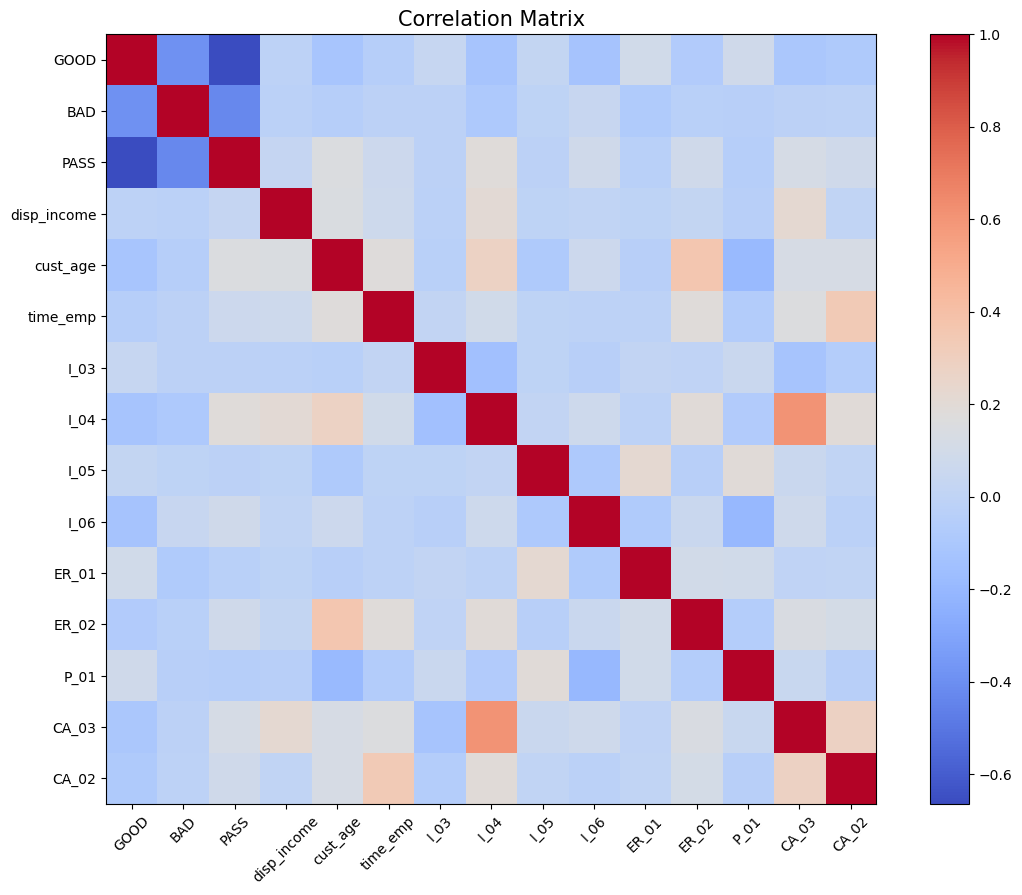

In [79]:
# Heatmap using color to represent the strength of correlations
plt.figure(figsize=(14, 10)) 

plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')

plt.show()

## Create subset #2
- `sns.pairplot` for multivariate analysis across features (reducing number of features to reduce clutter - however, I've experimented with all possible combinations of features and I find this selection to be the most insightful)
- Separately, I will revert back to the original `subset` (as it has more features selected) to explore 1v1 scatter plots, instead of 5x5 scatter plots with `sns.pairplot`

In [80]:
subset2 = df[['I_04', 'I_05', 'P_01', 'CA_03', 'cust_age']]
subset2.columns

Index(['I_04', 'I_05', 'P_01', 'CA_03', 'cust_age'], dtype='object')

/Users/willtollan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


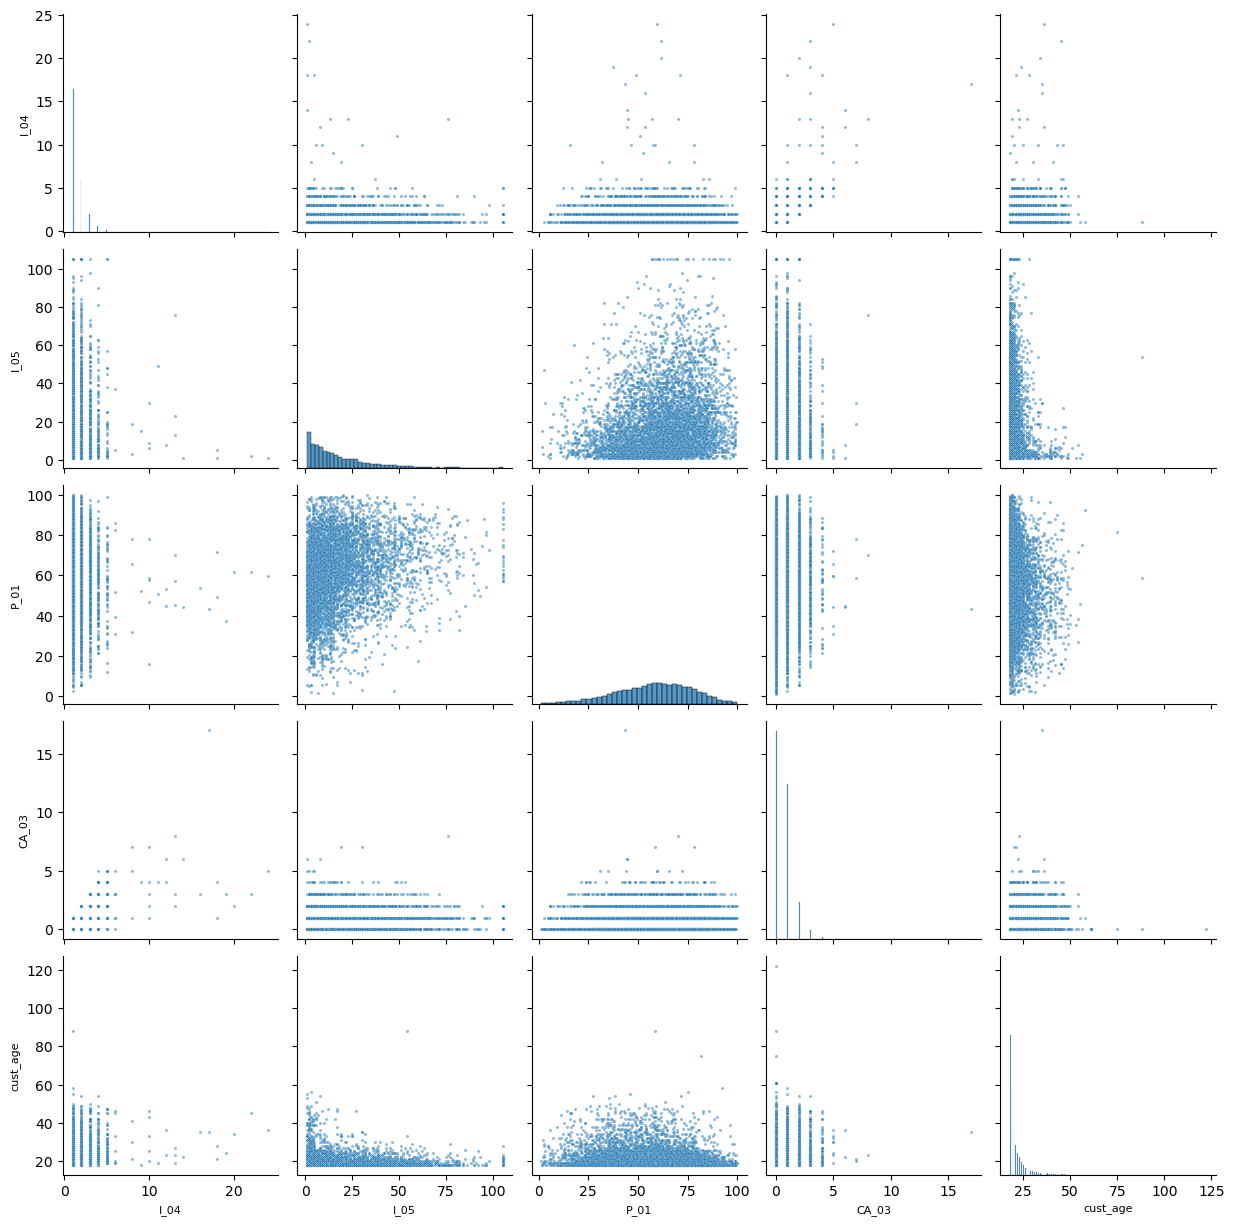

In [81]:
# Create multi-variate scatter plot
sns.pairplot(subset2, diag_kind='hist', plot_kws={'s': 5, 'alpha': 0.5})
plt.show()

### Revert back to original `subset` 
- Reverting back to original `subset` as it has more features selected, so I can explore 1v1 scatter plots, instead of 5x5 scatter plots with `sns.pairplot` across a greater selection of features

In [86]:
def linear_regression(x,y):
    sns.regplot(x=x, y=y, scatter_kws={'alpha': 0.25}, line_kws={'color': 'orange'})

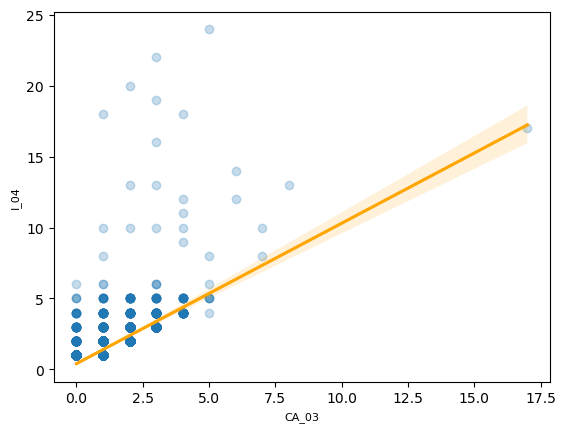

In [87]:
# CA_03 - Number of live current accounts
# I_04 - Total number of accounts (including loans, cards, contracts, etc)

# Corr Coef: 0.607720
# Strong correlation --> As number of live current accounts increase, total number of accounts increases
# Possible multicolliniarity issue - consider dropping either CA_03 or I_04

linear_regression(subset['CA_03'], subset['I_04'])

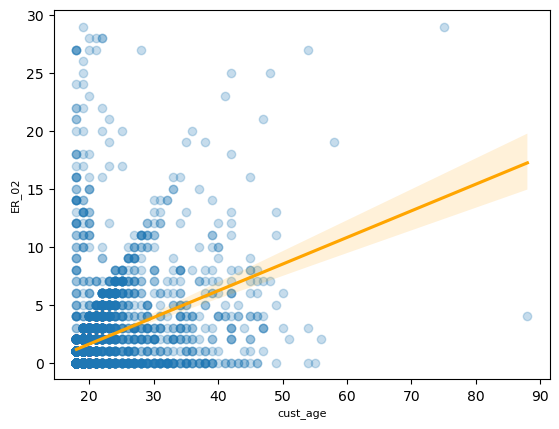

In [88]:
# ER_02 - Length of residence at current address
# cust_age - Customer age

# Corr Coef: 0.360841
# Weak Correlation --> Verying length of residence at current address if cust_age <20 as people still usually live at 
#                      home with their parents
#                  --> From cust_age 20+ there is a clear positive correlation since people start to settle down in a
#                      single residence after getting older
# Lots of variation since people change residence constantly irrespective of age

linear_regression(subset['cust_age'], subset['ER_02'])

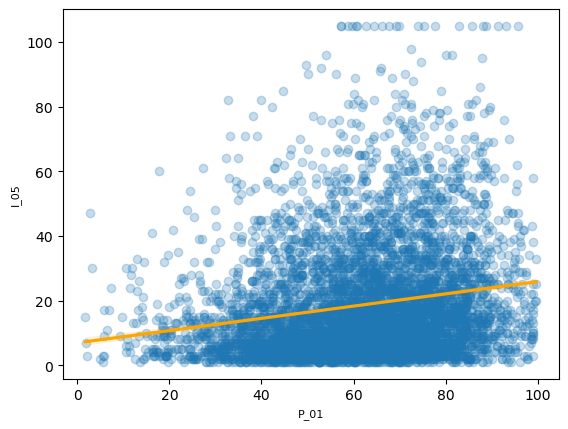

In [89]:
# P_01 - Average % of households with a live credit card
# I_05 - Total number of accounts (including loans, cards, telecoms, etc)

# There is capping at P_01=100

linear_regression(subset['P_01'], subset['I_05'])

## EDA - `Subset 3`
### Workflow
- `sns.pairplot` for multi-variate analysis across features with color representing the target labels as an extra dimention
- For the ease of plotting, specifically to satisfy the `hue` parameter, I consolidated the values across `GOOD`, `BAD`, and `PASS` classes into a single column
### Insights

In [90]:
subset3 = df[['GOOD', 'BAD', 'PASS', 'I_04', 'I_05', 'P_01', 'CA_03', 'cust_age']]
subset3.columns

Index(['GOOD', 'BAD', 'PASS', 'I_04', 'I_05', 'P_01', 'CA_03', 'cust_age'], dtype='object')

In [91]:
# Consolidate class labels into a single column 'CLASSES'
for index, row in subset3.iterrows():
    if row['GOOD'] == 1.0:
        subset3.at[index, 'CLASSES'] = 'GOOD'
    elif row['BAD'] == 1.0:
        subset3.at[index, 'CLASSES'] = 'BAD'
    elif row['PASS'] == 1.0:
        subset3.at[index, 'CLASSES'] = 'PASS'

/var/folders/tl/832r1zgn3kd0gl8vnt4yvl_00000gp/T/ipykernel_80502/1787212311.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset3.at[index, 'CLASSES'] = 'PASS'


In [92]:
subset3['CLASSES'].value_counts()

CLASSES
PASS    3912
GOOD    3508
BAD     1869
Name: count, dtype: int64

In [93]:
# Drop original class labels (now redundant since we have consolidated them into a single column)
subset3 = subset3.drop(columns=['GOOD', 'BAD', 'PASS'])
subset3.columns

Index(['I_04', 'I_05', 'P_01', 'CA_03', 'cust_age', 'CLASSES'], dtype='object')

/Users/willtollan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


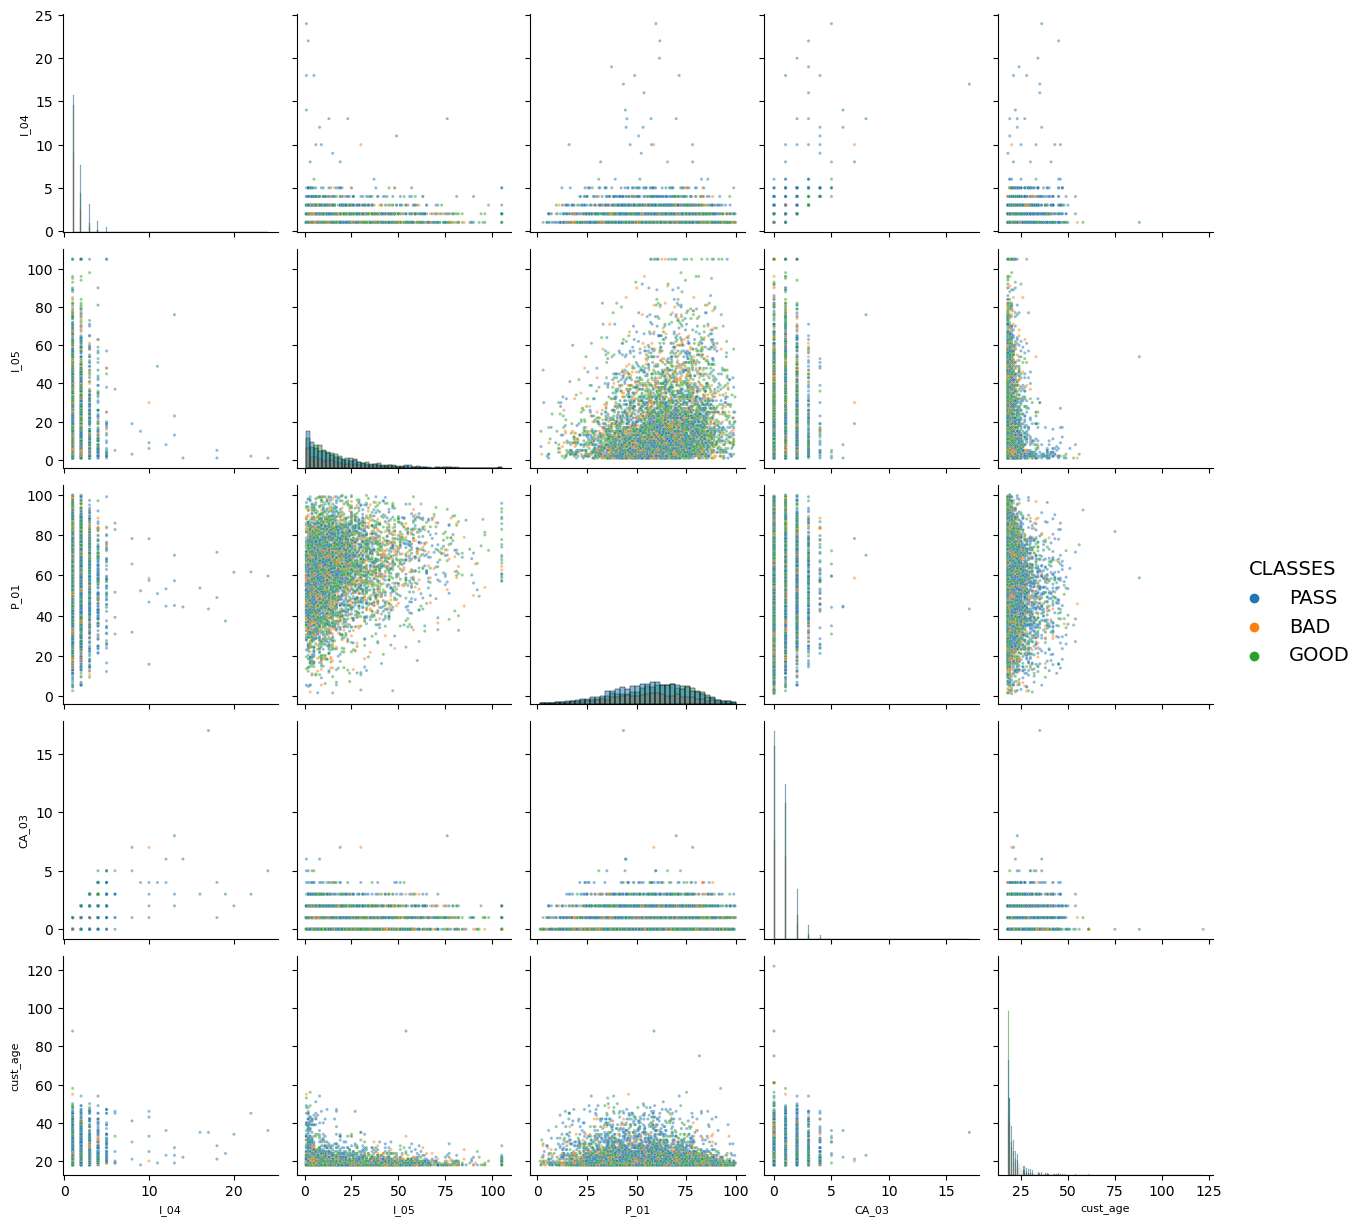

In [94]:
# Create multi-variate scatter plot with color indicating the class labels
sns.pairplot(subset3, hue='CLASSES', diag_kind='hist', plot_kws={'s': 5, 'alpha': 0.5})
plt.show()

<Axes: xlabel='CA_03', ylabel='I_04'>

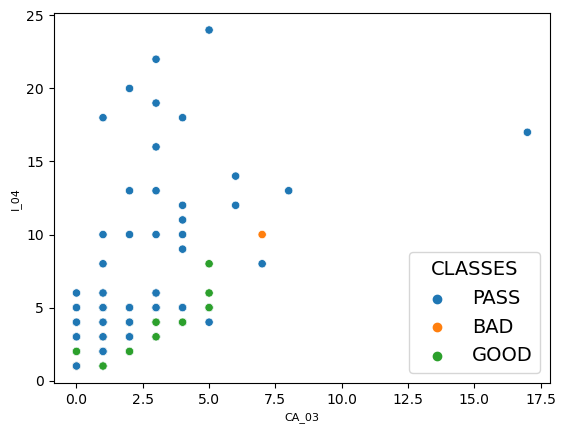

In [95]:
# I_04: Applicant - Total number of accounts (including loans, cards, contracts, etc)
# CA_03: Applicant - Number of live current accounts

# Clustering signal found --> GOOD customers tend to have limited total number of accounts, and a fairly limited
# number of live current accounts (likely an indication of financial/credit stability)

sns.scatterplot(x=subset3['CA_03'], y=subset3['I_04'], hue=subset3['CLASSES'])

## EDA - `subset4`
### Workflow
- Perform multi-variate scatter plot analysis on a subset of the numeric features with color representing the residence status of applicants from feature 'res_indicator'
### Insights
- **Clustering signal** found in the scatter plot between `cust_age` and `P_01` - younger applicants tend to live with their parents, while older applicants tend to rent, and purchase homes (in smaller quantities)
- This signal will be used to develop a **customized imputation strategy** for missing values in 'res_indicator' based on the applicant age, where younger applicants will be classified as 'P', and older applicant will be classified as 'R' (H: Home-owners will not be accounted for in this custom imputation approach since it appears in very small quantities and there's no clear signal to distinguish Home-Owners from Renters)

In [96]:
subset4 = df[['res_indicator', 'I_04', 'I_05', 'P_01', 'CA_03', 'cust_age']]
subset4.columns

Index(['res_indicator', 'I_04', 'I_05', 'P_01', 'CA_03', 'cust_age'], dtype='object')

/Users/willtollan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


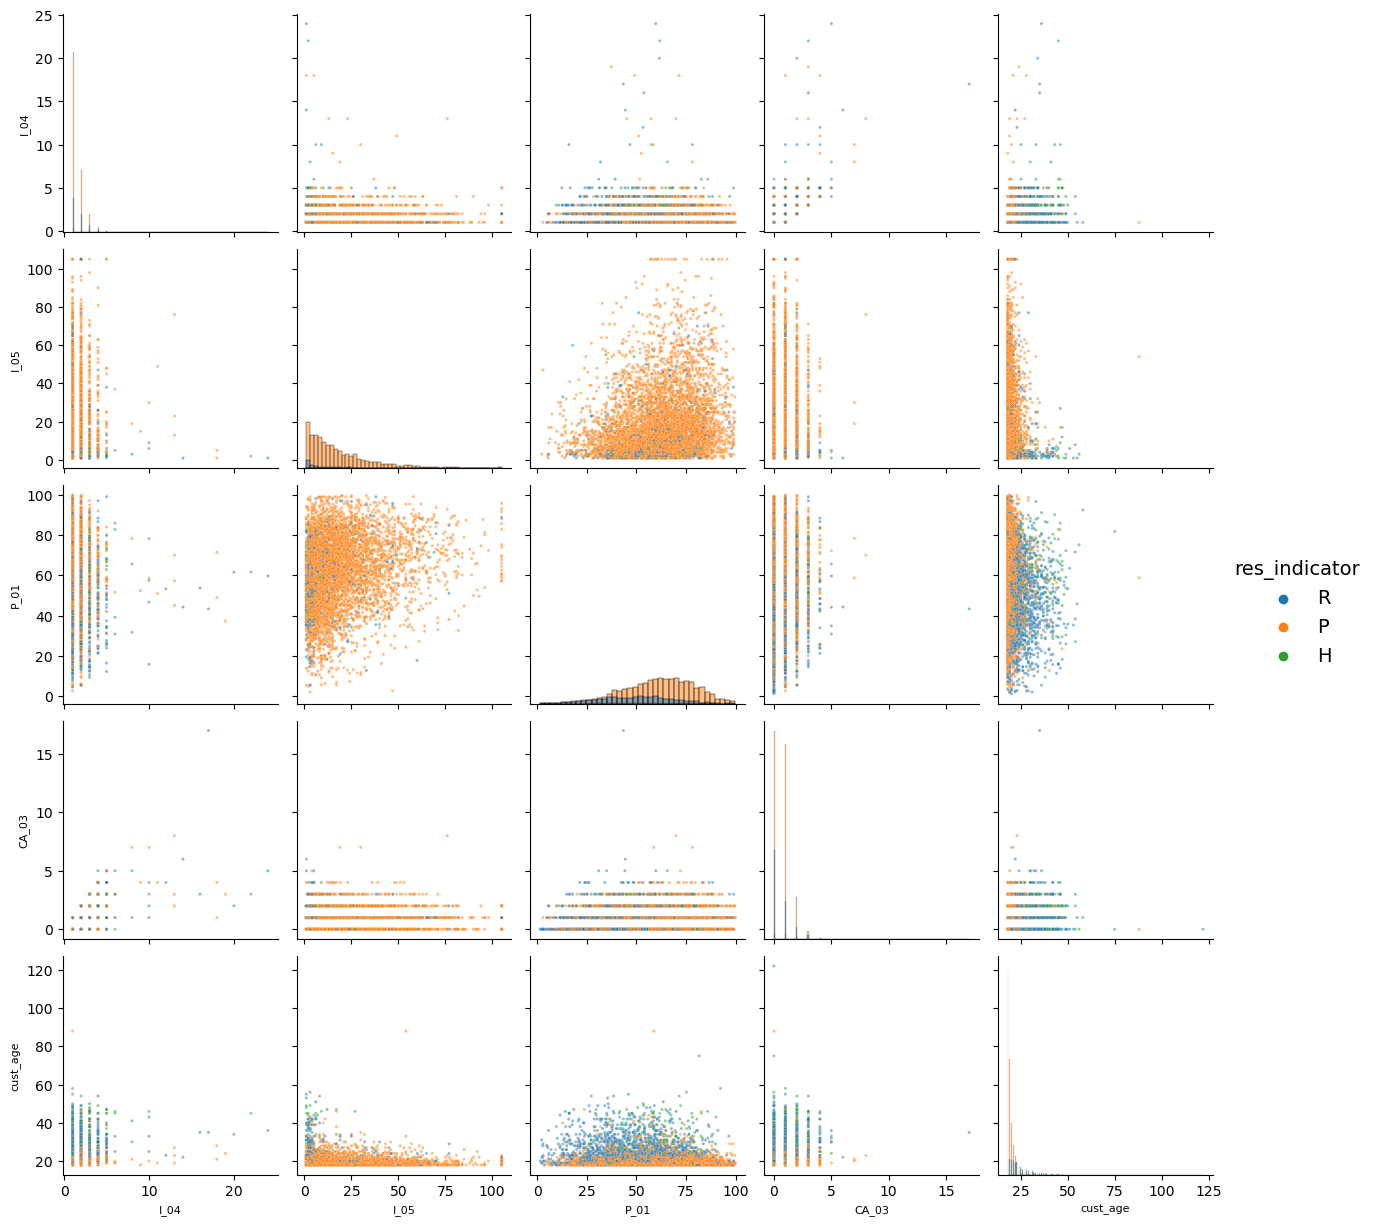

In [97]:
# Create multi-variate scatter plot with color indicating the res_indicator labels
sns.pairplot(subset4, hue='res_indicator', diag_kind='hist', plot_kws={'s': 5, 'alpha': 0.5})
plt.show()

<Axes: xlabel='P_01', ylabel='cust_age'>

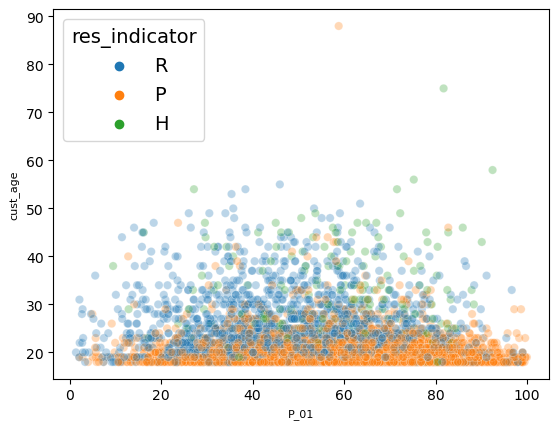

In [98]:
# cust_age: Customer's age at application
# P_01: Average % of households with a live credit card

# Clustering signal found --> younger applicants tend to live with their parents, while older applicants tend to rent,
# and purchase homes (in smaller quantities)

sns.scatterplot(x=subset4['P_01'], y=subset3['cust_age'], hue=subset4['res_indicator'], alpha=0.3)

## EDA - `subset 5`
### Workflow
- Create `subset5` to explore relationships/correlations across our **categorical variables and the targets**
- Produce contingency table and compute the "Chi-Squared Test of Independence" for each pair of categorical variables to determine any **dependencies** between variables
- Plot the dependencies/correlations using a 100% stacked bar chart to better visualise the **change in the proportions by category**, by ignoring the frequency/count of each category - therefore, all bars are equal height. In addition, will plot regular stacked bar chart with the bar height representing the **frequency of the category**. This provides a big picture view of how the proportions of GOOD, BAD, and PASS customers are fluctuating across categories, while also accounting for the frequency/count of the categories themselves 
### Insights
- 

In [99]:
subset5 = df[['GOOD', 'BAD', 'PASS', 'res_indicator', 'occ_code', 'time_emp', 'CA_01', 'I_03', 'I_04', 'I_05', 
                   'I_06', 'ER_01', 'ER_02', 'S_02', 'CA_02', 'CA_03', 'P_01']]
subset5.columns

Index(['GOOD', 'BAD', 'PASS', 'res_indicator', 'occ_code', 'time_emp', 'CA_01',
       'I_03', 'I_04', 'I_05', 'I_06', 'ER_01', 'ER_02', 'S_02', 'CA_02',
       'CA_03', 'P_01'],
      dtype='object')

In [100]:
# Consolidate class labels into a single column 'CLASSES'
for index, row in subset5.iterrows():
    if row['GOOD'] == 1.0:
        subset5.at[index, 'CLASSES'] = 'GOOD'
    elif row['BAD'] == 1.0:
        subset5.at[index, 'CLASSES'] = 'BAD'
    elif row['PASS'] == 1.0:
        subset5.at[index, 'CLASSES'] = 'PASS'

/var/folders/tl/832r1zgn3kd0gl8vnt4yvl_00000gp/T/ipykernel_80502/4206606752.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset5.at[index, 'CLASSES'] = 'PASS'


In [101]:
subset5 = subset5.drop(columns=['GOOD', 'BAD', 'PASS'])
subset5.columns

Index(['res_indicator', 'occ_code', 'time_emp', 'CA_01', 'I_03', 'I_04',
       'I_05', 'I_06', 'ER_01', 'ER_02', 'S_02', 'CA_02', 'CA_03', 'P_01',
       'CLASSES'],
      dtype='object')

In [102]:
# Create function for chi-squared test (x=feature, y=CLASSES)

from scipy.stats import chi2_contingency

def chi_squared(x,y):
    
    cross_tab = pd.crosstab(subset5[x], subset5[y])
    print('Cross Tabulation:\n', cross_tab, '\n')
    
    result = chi2_contingency(cross_tab,)
    stats, p_value, a, b = result
    
    if p_value > 0.05:
        print(f'With p-value as {p_value} we can conclude with 95% confidence that these variables are independent')
    else:
        print(f'With p-value as {p_value} we can conclude with 95% confidence there is a dependency/correlation between the two variables')

### Variable: `res_indicator`

In [159]:
def stacked_bar_chart(df, column):
    # Print Chi-Squared scores - call function
    print(chi_squared(column.name, 'CLASSES'))
    
    # Create pivot table for selected column and 'CLASSES'
    stacked_plot_df = (df
                       .groupby(column)['CLASSES']
                       .value_counts(normalize=True)
                       .mul(100)
                       .round(2)
                       .unstack())
    
    # Create 2 subplots - first is the 100% stacked bar chart, and second is the regular stacked bar chart
    fig, (ax1, ax2) = plt.subplots(figsize=(10, 8), nrows=2)
    
    # Plot the first plot on the upper axes (ax1)
    ax1.bar(stacked_plot_df.index, stacked_plot_df['BAD'], label='BAD', width=0.3, color='orangered')
    ax1.bar(stacked_plot_df.index, stacked_plot_df['GOOD'], bottom=stacked_plot_df['BAD'], label='GOOD', 
       width=0.3, color='chartreuse')
    ax1.bar(stacked_plot_df.index, stacked_plot_df['PASS'], bottom=stacked_plot_df['BAD'] + stacked_plot_df['GOOD'], 
       label='PASS', width=0.3, color='deepskyblue')
    # Add data points to 100% stacked bar chart - representing % breakdown of target labels
    for c in ax1.containers:
        labels = [str(round(v.get_height(), 2)) + '%' if v.get_height() > 0 else '' for v in c]
        ax1.bar_label(c,
                      label_type='center',
                      labels=labels,
                      size=10)
    # Set title and legend
    ax1.set_title(f'% Breakdown of {column.name} by target')
    ax1.legend(labels=['BAD', 'GOOD', 'PASS'],
               fontsize=10,
               title_fontsize=5,
               bbox_to_anchor=[1,1])
    
    # Plot the second plot on the lower axes (ax2)
    ax2.set_title(f'Distribution of {column.name} by target')
    sns.histplot(data=df, x=column, hue=df['CLASSES'], multiple='stack')

Cross Tabulation:
 CLASSES                BAD  GOOD  PASS
S_02                                  
N - credit search LTM  989  2291  1733
Y - credit search LTM  880  1217  2179 

With p-value as 2.656755387760791e-72 we can conclude with 95% confidence there is a dependency/correlation between the two variables
None


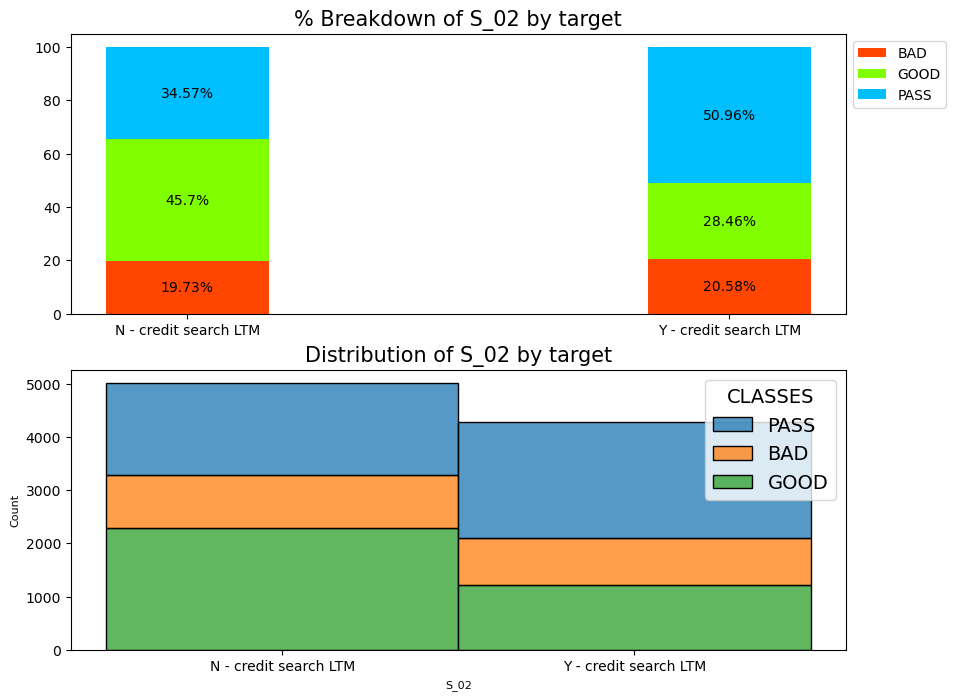

In [160]:
stacked_bar_chart(subset5, subset5['S_02'])

Cross Tabulation:
 CLASSES         BAD  GOOD  PASS
res_indicator                  
H                26    57   139
P              1335  2625  2396
R               385   556  1106 

With p-value as 3.8865739496904213e-47 we can conclude with 95% confidence there is a dependency/correlation between the two variables
None


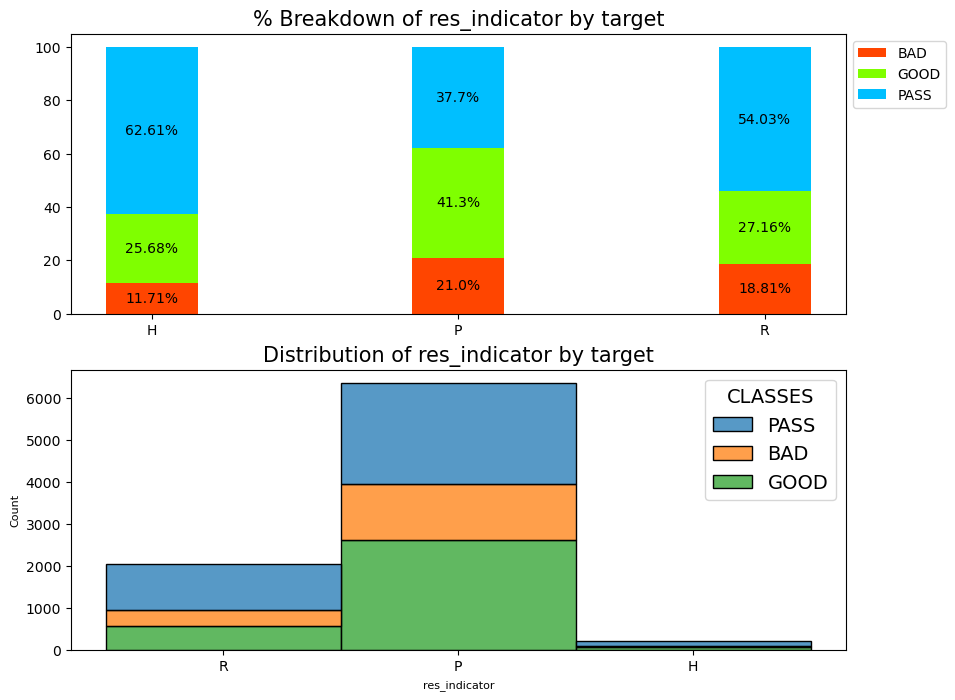

In [161]:
stacked_bar_chart(subset5, subset5['res_indicator'])

Cross Tabulation:
 CLASSES  BAD  GOOD  PASS
CA_01                   
1         11     8    56
2         56    22   123
3        929  1608  2075
4         81   200   110
5        792  1670  1548 

With p-value as 8.866537046882004e-35 we can conclude with 95% confidence there is a dependency/correlation between the two variables
None


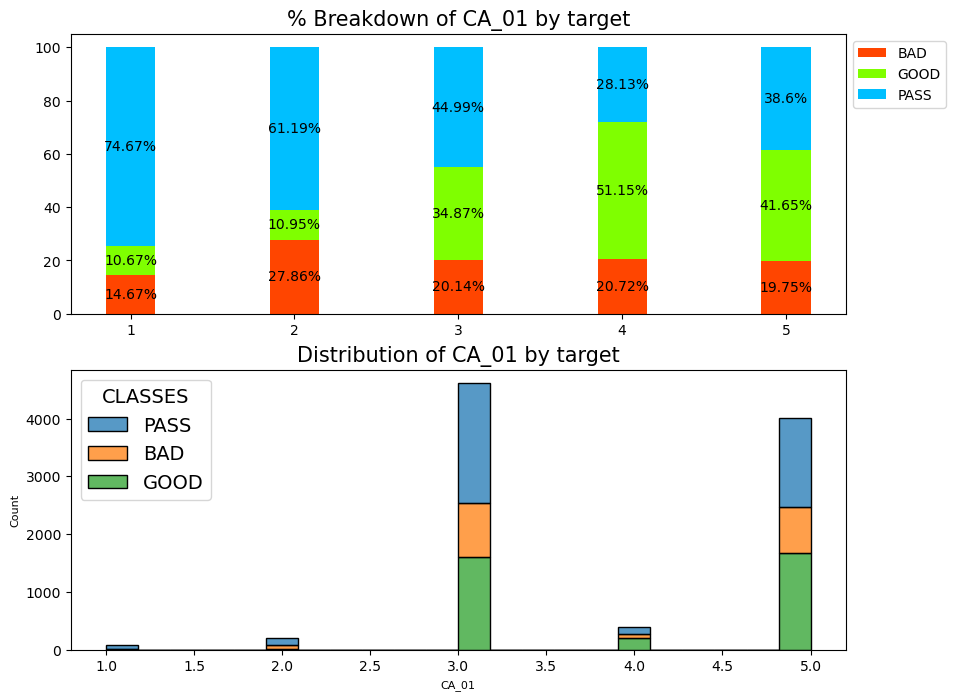

In [162]:
stacked_bar_chart(subset5, subset5['CA_01'])

In [163]:
# Remap occupation codes (these remapped codes will also be used on actual data: df)
value_map = {'SB': 'MP', 'SC': 'TS', 'SF': 'MP', 'SH': 'TS', 'SG': 'SS', 'SN': 'SS', 'SL': 'SS', 'SM': 'SS',
            'SD': 'PA', 'SE': 'PA', 'SJ': 'PA', 'FT': 'UE', 'SK': 'UE', 'SA': 'SP', 'SO': 'SP'}

In [164]:
subset5['occ_code'] = subset5['occ_code'].replace(value_map)
subset5['occ_code'].unique()

array(['MP', 'SP', 'PA', 'SS', 'TS', 'UE'], dtype=object)

Cross Tabulation:
 CLASSES   BAD  GOOD  PASS
occ_code                 
MP        313   508   622
PA        206   301   477
SP        881  1534  1481
SS        193   446   679
TS        207   515   536
UE         69   204   117 

With p-value as 4.818175469011512e-29 we can conclude with 95% confidence there is a dependency/correlation between the two variables
None


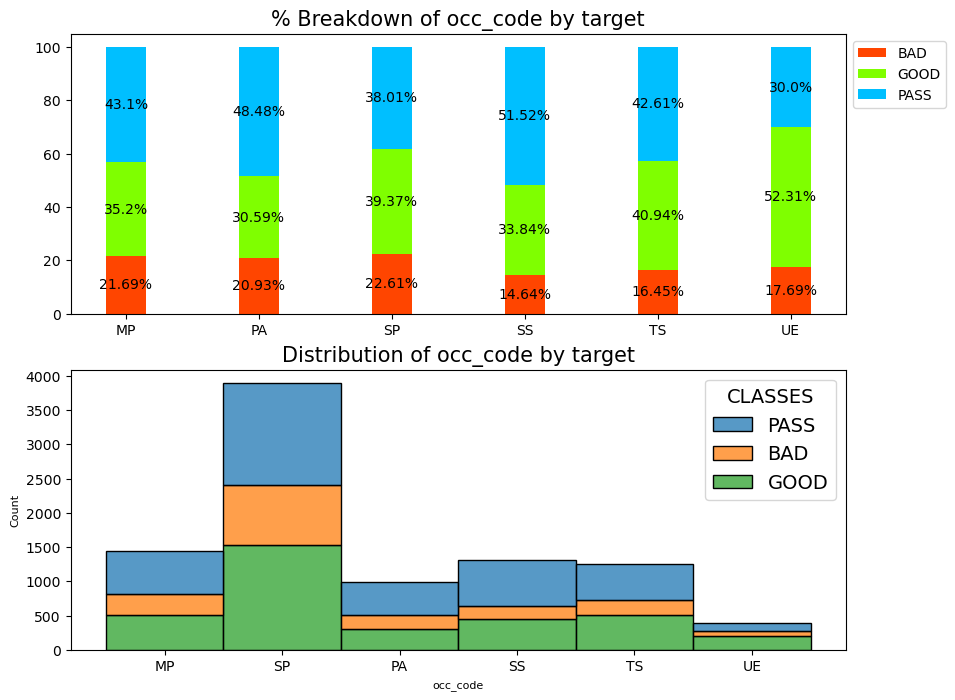

In [165]:
stacked_bar_chart(subset5, subset5['occ_code'])

## Categorical imputation
### Imputation experiment
- Only categorical feature with missing values is `res_indicator` with 7%
- Run experiment with 2 imputations methods for `res_indicator` variable:
<br> (1) Custom imputation method based on applicant age cut-off
<br> (2) 'Most frequent' - with `SimpleImputer`
- Experiment are based on a **clean extract of the data**, where there are no missing values. This clean data will be used as a test set holding the true/actual data. Then generate training set by taking copy of the clean data, and inject 50% missing values. Lastly, evaluate imputation performance across the 'most frequent' method versus my customiazed method, by computing the precision, recall, accuracy, and confusion matricies between the test and training sets

### Categorical imputation I: prepare test set - `df_cat`

In [ ]:
# 'res_indicator' is the only categorical variable with missing values
df.select_dtypes('object').isnull().sum()

In [ ]:
# 7% missing values
df['res_indicator'].isnull().sum()/len(df['res_indicator'])

In [ ]:
# subset_clean as a Baseline for Actual/Correct values for categorical imputation experiment
df_cat = df[['res_indicator', 'cust_age']]

In [ ]:
# Mark rows with missing values
df_cat['is_clean'] = df_cat.isnull().any(axis=1).map({True: 'dirty row', False: 'clean row'})
print(df_cat.shape)
df_cat.head()

In [ ]:
# 8625 out of 9289 rows (93%) are clean, and can be used baseline actual values for imputation experimentation
df_cat['is_clean'].value_counts()

In [ ]:
# Drop dirty rows --> now df_cat is fully cleaned
df_cat = df_cat[df_cat['is_clean'] != 'dirty row']

In [ ]:
df_cat = df_cat.drop('is_clean', axis=1)

In [ ]:
# df_cat is fully cleaned
print(df_cat.shape)
df_cat.isnull().sum()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply OneHotEncoder to res_indicator
ohe = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
df_cat_encoded = ohe.fit_transform(df_cat[['res_indicator']])

# Append encoded columns to df_cat, and drop original feature res_indicator
df_cat = pd.concat([df_cat, df_cat_encoded], axis=1).drop(columns = ['res_indicator'])

df_cat

###  Categorical imputation II: prepare training base data -  `missing5` (50% NaN)
- Copy the fully cleaned and OneHotEncoded dataframe `df_cat` and call it `missing5`
- Then inject `missing5` with 50% missing values only in the categorical feature `res_indicator` by calling the function `add_nan_values`
- This dataframe `missing5` with the artificial missing values will be used as a **base** for the 2 training sets in this categorical imputation experiment: (1) 'most frequent' with SimpleImputer, (2) custom approach based on signals found in the data

In [ ]:
# Create function which takes a data and injects varying percentages of missing values/NaN
# This function will be both in Numeric and Categorical imputation experiments

#exclude_columns = ['I_06', 'cust_age', 'CA_03']

def add_nan_values(dataframe, percentage, exclude_columns):
    num_nan_values = int(percentage * len(dataframe))
    for col in dataframe.columns:
        if col not in exclude_columns:
            row_indices = np.random.choice(len(dataframe), num_nan_values, replace=False)
            dataframe.iloc[row_indices, dataframe.columns.get_loc(col)] = np.nan

In [ ]:
# Create copy of df_cat (our 'True' data), then inject with NaN, so we can perform imputation
missing50 = df_cat.copy()

# Generate 50% missing values for 'res_indicator' (excluding 'cust_age' as this needs to be fully clean)
add_nan_values(missing50, 0.5, 'cust_age')

###  Categorical imputation III: 'most frequent' strategy - `missing5_mode`
- Impute the categorical feature `res_indicator` (50% injected missing values) with the 'most frequent'/mode strategy using `SimpleImputer`
- Evaluate imputation performance with confusion matrix using training set `missing5_mode` and test set `df_cat`

In [ ]:
# Take a copy of the 'missing5' dataframe containing 50% NaN
missing50_mode = missing50.copy()
missing50_mode

In [ ]:
# Missing values equally distributed across labels
missing50_mode.isnull().sum()

In [ ]:
from sklearn.impute import SimpleImputer

# Apply 'most frequent' imputation with SimpleImputer
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
missing50_mode = mode_imputer.fit_transform(missing50_mode)

# Convert to df
missing50_mode = pd.DataFrame(missing50_mode, columns=['cust_age', 'res_indicator_H', 'res_indicator_P', 
                                                   'res_indicator_R'])
missing50_mode

In [ ]:
# As expected, poor imputation performance. Every missing value is imputed with the 'most frequent' value, meaning we
# have terrible recall in 'res_indicator_H' and 'res_indicator_R', and poor precision in 'res_indicator_P'

from sklearn.metrics import classification_report

print(classification_report(df_cat.iloc[:, 1:4], missing50_mode.iloc[:, 1:4], target_names=
                            ['res_indicator_H', 'res_indicator_P', 'res_indicator_R']))

###  Categorical imputation IV: custom strategy - `missing5_custom`
- The feature `cust_age` appears to be a reliable indicator of residential status, with a lot of common sense to back it up. According to the data, applicants over 25 years are more likely to rent and own houses, while applicants over 25 years tend to live in their parents house. Therefore this custom imputation strategy will make classifications based on the threshold customer age of 25
- Evaluate imputation performance with confusion matrix using training set `missing5_custom` and test set `df_cat`

In [ ]:
# Recall the clustering signal younger applicants tend to live with their parents, while older applicants tend to 
# rent, and purchase homes (in smaller quantities)

sns.scatterplot(x=df['P_01'], y=df['cust_age'], hue=df['res_indicator'], alpha=0.3)

In [ ]:
# Create Custom set
missing50_custom = missing50.copy()
missing50_custom.head()

In [ ]:
# Median applicant age is 19 --> help inform cut-off point for classification-based imputation
missing50_custom['cust_age'].describe()

In [ ]:
# Applying custom imputation strategy on 'res_indicator_H' label

# Fill missing values in res_indicator_H with 0 (zero-imputation)
missing50_custom['res_indicator_H'] = missing50_custom['res_indicator_H'].fillna(0)
missing50_custom.head()

In [ ]:
# Applying custom imputation strategy on 'res_indicator_P'

# Create copy of 'res_indicator_P', and declare as new variable 'res_indicator_P_helper'. For each missing value in 
# the variable 'res_indicator_P_helper', if the instance is unclassified (i.e. negative for H, P, and R), and if the 
# corresponding customer age<=25, then take value 1.0, otherwise 0.0

missing50_custom['res_indicator_P_helper'] = missing50_custom\
['res_indicator_P'].fillna(value=missing50_custom.apply\
                           (lambda x: 1.0 if (x['cust_age'] <= 25) and (x['res_indicator_H'] == 0.0) \
                            and (np.isnan(x['res_indicator_R']) or x['res_indicator_R'] == 0.0) else 0.0, axis=1))

# Assign positive values to 'res_indicator_P_helper' if 'res_indicator_H' and 'res_indicator_R' are negative
missing50_custom['res_indicator_P_helper'] = np.where((missing50_custom['res_indicator_H'] == 0.0) & 
                                                     (missing50_custom['res_indicator_R'] == 0.0), 1.0, 
                                                     missing50_custom['res_indicator_P_helper'])

# Drop 'res_indicator_P' in favor for transformed 'res_indicator_P_helper'
missing50_custom = missing50_custom.drop(['res_indicator_P'], axis=1)

# Rename 'res_indicator_P_helper' to original name
missing50_custom = missing50_custom.rename(columns={'res_indicator_P_helper': 'res_indicator_P'})

# Re-order to original order
missing50_custom = missing50_custom[['cust_age', 'res_indicator_H', 'res_indicator_P', 'res_indicator_R']]

In [ ]:
missing50_custom.head()

In [ ]:
# Create helper column 'sum' to total up values for each row across res_indicator_H/P/R --> only 1 positive class per
# row because this is multiclass data
# fillna() method used to handle addition with NaN values

# 0.0 values in 'sum' column signal rows where 'res_indicator_R' is NaN, and 'res_indicator_H'/'res_indicator_P' are
# negative, meaning we must impute the NaN value with 1.0 to satisfy the condition that each row has exactly 1
# positive class since this is multiclass data

missing50_custom['sum'] = missing50_custom['res_indicator_H'].fillna(0.0) + \
missing50_custom['res_indicator_P'].fillna(0.0) + missing50_custom['res_indicator_R'].fillna(0.0)

In [ ]:
# Applying custom imputation strategy on 'res_indicator_R'

# For each instance, if the value in 'sum' column equals 0.0, take value 1.0, otherwise 0.0
missing50_custom['res_indicator_R'] = missing50_custom\
['res_indicator_R'].fillna(value=missing50_custom.apply(lambda x: 1.0 if (x['sum'] == 0.0) else 0.0, axis=1))

In [ ]:
missing50_custom['sum'].value_counts()

In [ ]:
missing50_custom = missing50_custom.drop('sum', axis=1)

In [ ]:
missing50_custom.head()

In [ ]:
# Sanity check - sum of positive classes for each label indeed equals the length of the dataframe

(missing50_custom['res_indicator_H'].value_counts()[1.0] + missing50_custom['res_indicator_P'].value_counts()[1.0] + 
 missing50_custom['res_indicator_R'].value_counts()[1.0]) == len(missing50_custom)

In [ ]:
# Classification report to reconcile metrics with confusion matricies

print(classification_report(df_cat.iloc[:, 1:4], missing50_custom.iloc[:, 1:4], target_names=
                            ['res_indicator_H', 'res_indicator_P', 'res_indicator_R']))

In [ ]:
# Plot confusion matrix for binary label 'res_indicator_H' (train: missing5_custom, test: df_cat)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

cm_h = confusion_matrix(df_cat.iloc[:, 1:2], missing50_custom.iloc[:, 1:2])
disp_h = ConfusionMatrixDisplay(confusion_matrix=cm_h)
disp_h.plot(cmap=sns.color_palette('Blues', as_cmap=True))

print('Accuracy score:', accuracy_score(df_cat.iloc[:, 1:2], missing50_custom.iloc[:, 1:2]))
print('Precision score:', precision_score(df_cat.iloc[:, 1:2], missing50_custom.iloc[:, 1:2]))
print('Recall score:', recall_score(df_cat.iloc[:, 1:2], missing50_custom.iloc[:, 1:2]))

plt.suptitle('res_indicator_H', fontsize=14, fontweight='normal')
plt.show()

In [ ]:
# Plot confusion matrix for binary label 'res_indicator_P' (train: missing5_custom, test: df_cat)

cm_p = confusion_matrix(df_cat.iloc[:, 2:3], missing50_custom.iloc[:, 2:3])
disp_p = ConfusionMatrixDisplay(confusion_matrix=cm_p)
disp_p.plot(cmap=sns.color_palette('Greys', as_cmap=True))

print('Accuracy score:', accuracy_score(df_cat.iloc[:, 2:3], missing50_custom.iloc[:, 2:3]))
print('Precision score:', precision_score(df_cat.iloc[:, 2:3], missing50_custom.iloc[:, 2:3]))
print('Recall score:', recall_score(df_cat.iloc[:, 2:3], missing50_custom.iloc[:, 2:3]))

plt.suptitle('res_indicator_P', fontsize=14, fontweight='normal')
plt.show()

In [ ]:
# Plot confusion matrix for binary label 'res_indicator_R' (train: missing5_custom, test: df_cat)

cm_r = confusion_matrix(df_cat.iloc[:, 3:4], missing50_custom.iloc[:, 3:4])
disp_r = ConfusionMatrixDisplay(confusion_matrix=cm_r)
disp_r.plot(cmap=sns.color_palette('Purples', as_cmap=True))

print('Accuracy score:', accuracy_score(df_cat.iloc[:, 3:4], missing50_custom.iloc[:, 3:4]))
print('Precision score:', precision_score(df_cat.iloc[:, 3:4], missing50_custom.iloc[:, 3:4]))
print('Recall score:', recall_score(df_cat.iloc[:, 3:4], missing50_custom.iloc[:, 3:4]))

plt.suptitle('res_indicator_R', fontsize=14, fontweight='normal')
plt.show()

## Numeric imputation
### Imputation experiment
- Lots of numeric features with missing values at varying quantities
- Run numeric **imputation experiment** by evaluating the imputation performance across 5 methods: 
<br> (1) Zero imputation - with `SimpleImputer`
<br> (2) Mean imputation - with `SimpleImputer`
<br> (3) Median imputation - with `SimpleImputer`
<br> (4) K-Nearest Neighbors imputation - with `KNNImputer`
<br> (5) MICE (Iterative) imputation - with `IterativeImputer`
- Experiment are based on a **clean extract of the data**, where there are no missing values. This clean data will be used as a **true/actual** data. Then generate **training/imputed** set by taking copy of the clean data, inject varying amounts of missing values (10-50%). Lastly, evaluate imputation performance across the 5 methods, by computing the **Mean-Squared Error** (MSE) between the test and training sets

In [ ]:
# Show proportion of missing values across all variables that have them
for series in df.select_dtypes(include=['float64', 'int64']):
    if df[series].isnull().any():
        total_count = len(df[series])
        null_count = df[series].isnull().sum()
        percentage = (null_count / total_count) * 100
        print(f'% NaN for {series} is: {percentage:.2f}%')

### Numeric imputation I: prepare test set - `df_num`

In [ ]:
# 'df_num' as a Baseline for Actual/Correct values for numeric imputation experiment (Exclude numeric vars: I_03, 
# I_04, CA_02 from experiment (treated with zero-imputation instead)
df_num = df[['disp_income', 'cust_age', 'time_emp', 'ER_01', 'ER_02', 'I_05', 'I_06', 'P_01', 'CA_03']]

In [ ]:
# Create new column 'is_clean' that marks if a row is clean (no missing values), or dirty
df_num['is_clean'] = df_num.isnull().any(axis=1).map({True: 'dirty row', False: 'clean row'})
print(df_num.shape)
df_num.head()

In [ ]:
# 26% of rows are clean, and can be used baseline actual values for imputation experimentation
df_num['is_clean'].value_counts()

In [ ]:
# Drop dirty rows --> now df_num is fully cleaned
df_num = df_num[df_num['is_clean'] != 'dirty row']

In [ ]:
df_num = df_num.drop('is_clean', axis=1)

In [ ]:
df_num.head()

In [ ]:
# df_num is fully cleaned
print(df_num.shape)
df_num.isnull().sum().sum()

###  Numeric imputation II: prepare training base data - (10%-50% NaN)
- Copy the fully cleaned and OneHotEncoded dataframe `df_cat` and call it `missing5`
- Then inject `missing5` with 50% missing values only in the categorical feature `res_indicator` by calling the function `add_nan_values`
- This dataframe `missing5` with the artificial missing values will be used as a **base** for the 2 training sets in this categorical imputation experiment: (1) 'most frequent' with SimpleImputer, (2) custom approach based on signals found in the data

In [ ]:
# 'missing10' = 10% NaN
# 'missing20' = 20% NaN
# ...
# 'missing50' = 50% NaN

missing10 = df_num.copy()
missing20 = df_num.copy()
missing30 = df_num.copy()
missing40 = df_num.copy()
missing50 = df_num.copy()

# # Exclude features which never had missing values to begin with
exclude_columns = ['I_06', 'cust_age', 'CA_03']

# Create lists as inputs for function 'add_nan_values'
missing_list = [missing10, missing20, missing30, missing40, missing50]
percentages_list = [0.1, 0.2, 0.3, 0.4, 0.5]

# Create the missing sets with varying percentage of injected missing numbers
for i, j in zip(missing_list, percentages_list):
    add_nan_values(i, j, exclude_columns)

###  Numeric imputation III: time to experiment
- Run the imputation experiment to compare the 5 strategies: zero, mean, median, KNN, and MICE (iterative) imputation. All methods will train on the 5 training sets, generated with varying amounts of missing values ranging from 10%-50%
- Evaluate performance using Mean-Squared Error (MSE) scores

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.metrics import mean_squared_error

mses = []

# For technique arg --> select 'zero', 'mean', 'median', 'knn', 'iterative'
def imputation_num_experiment(data, technique):
    
    if technique == 'zero':
        for missing_set in data:
            zero_imputer = SimpleImputer(missing_values=np.nan, add_indicator=False, 
                                         strategy='constant', fill_value=0)
            missing_set = zero_imputer.fit_transform(missing_set)
            mse1 = mean_squared_error(df_num, missing_set)
            mses.append(mse1)
            print(mse1)
        
    elif technique == 'mean':
        for missing_set in data:
            mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
            missing_set = mean_imputer.fit_transform(missing_set)
            mse2 = mean_squared_error(df_num, missing_set)
            mses.append(mse2)
            print(mse2)
            
    elif technique == 'median':
        for missing_set in data:
            median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
            missing_set = median_imputer.fit_transform(missing_set)
            mse3 = mean_squared_error(df_num, missing_set)
            mses.append(mse3)
            print(mse3)
            
    elif technique == 'knn':
        for missing_set in data:
            knn_imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)
            missing_set = knn_imputer.fit_transform(missing_set)
            mse4 = mean_squared_error(df_num, missing_set)
            mses.append(mse4)
            print(mse4)
            
    elif technique == 'iterative':
        for missing_set in data:
            iterative_imputer = IterativeImputer(missing_values=np.nan, n_nearest_features=5, min_value=0)
            missing_set = iterative_imputer.fit_transform(missing_set)
            mse5 = mean_squared_error(df_num, missing_set)
            mses.append(mse5)
            print(mse5)

In [ ]:
imputation_num_experiment(missing_list, 'zero')

In [ ]:
imputation_num_experiment(missing_list, 'mean')

In [ ]:
imputation_num_experiment(missing_list, 'median')

In [ ]:
imputation_num_experiment(missing_list, 'knn')

In [ ]:
imputation_num_experiment(missing_list, 'iterative')

In [ ]:
df_mses = pd.DataFrame({
    'zero': mses[:5],
    'mean': mses[5:10],
    'median': mses[10:15],
    'knn': mses[15:20],
    'iterative': mses[20:25]
})

df_mses.insert(0, '% missing values', ['10%', '20%', '30%', '40%', '50%'])

df_mses

In [ ]:
# IterativeImputer are consistently outperforming the rest
# Optimal setting for IterativeImputer is n_nearest_features=5 

x_mses = df_mses.iloc[:, 1:6]
y_mses = df_mses.iloc[:, :1]

sns.lineplot(data=x_mses, markers=['X'], markersize=10)
plt.xticks(range(len(x_mses)), x_mses.index*10+10)

plt.ylabel('MSE')
plt.xlabel('% missing values')
plt.title('Comparitive performance across 5 sets with varying % NaN')

## Split data
- Split data into training and test sets before creating pipelines to alleviate the affects of **data leakage**/contaminating the test set
- Set parameter `stratify=y` to perform **stratified split** so the class proportions are equal in both sets (important since we have class imbalance)
- Split data with random_state=xxxx, so we can **reproduce the same results**
### Target variable format
- Valid multiclass structures for `Y`:
- 1d or column vector containing more than two discrete values
- Dense binary matrix of shape (n_samples, n_classes) where each column represents a single class
- **Version 2** Other classifiers work with labels structured as separate columns. Therefore will leave the classes stucture as it currently is
- Resource: https://scikit-learn.org/stable/modules/multiclass.html

### Version 1 - 1d column

In [ ]:
for index, row in df.iterrows():
    if row['GOOD'] == 1.0:
        df.at[index, 'CLASSES'] = 1.0
    elif row['BAD'] == 1.0:
        df.at[index, 'CLASSES'] = 2.0
    elif row['PASS'] == 1.0:
        df.at[index, 'CLASSES'] = 3.0

In [ ]:
df = df.drop('GOOD', axis=1)
df = df.drop('BAD', axis=1)
df = df.drop('PASS', axis=1)

In [ ]:
from sklearn.utils import shuffle

# Shuffle data
df = shuffle(df, random_state=2799)
df.reset_index (drop=True , inplace=True)

In [ ]:
# Split data into X and Y
X = df.iloc[:, :16]
y = df.iloc[:, 16:17]

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into Train & Test in a stratified manner
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2799, stratify=y)

### Version 2 - dense binary matrix

In [ ]:
from sklearn.utils import shuffle

# Shuffle data
df = shuffle(df, random_state=2799)
df.reset_index (drop=True , inplace=True)

In [ ]:
# Split data into X and Y
X = df.iloc[:, 3:19]
y = df.iloc[:, :3]

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into Train & Test in a stratified manner
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2799, stratify=y)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
# Validate class proportions are 

print('Proportion of GOOD class in y_train is:', 2456/6502)
print('Proportion of BAD class in y_train is:', 1308/6502)
print('Proportion of PASS class in y_train is:', 2738/6502, '\n')
print('Proportion of GOOD class in y_test is:', 1052/2787)
print('Proportion of BAD class in y_test is:', 561/2787)
print('Proportion of PASS class in y_test is:', 1174/2787)

##  Numeric pipeline
### Add `IterativeImputer` into numeric pipeline
- Impute the numeric feature using the `IterativeImputer` since it has consistently outperformed all other imputation methods fitted in our experiment
- Setting parameter `min_value=0` to keep all values positive
- Setting parameter `n_nearest_features=5` as this has shown the best performance
### Add `SimpleImputer` into numeric pipeline
- Impute the numeric features usinf `SimpleImputer` 
### Add `FunctionTransformer` into numeric pipeline
- Convert back interger variables to original data type, this includes: `disp_income`, `cust_age`, `time_emp`, `I_03`, `I_04`, `ER_01`, `ER_02`, `I_05`, and `CA_02`
- This is required since `IterativeImputer` outputs as float64

### Zero-imputation
- All 0.0 values in `CA_03` (n=4676) correspond to:
<br> 4496 out of 4500 (99%) total missing values in `CA_02`
<br> 4227 out of 4227 (100%) of total missing values in `I_04`
<br> 3451 out of 3451 (100%) of total missing values in `I_03`
- Since the 0.0 values for `CA_03` signal that applicant's have no live current accounts, it is reasonable to assume these applicant's will neither have any corresponding value for: `CA_02`, `I_03`, nor `I_04`. Given these 3 variables represent the following:
<br> `CA_02` - Total balance of all live accounts
<br> `I_03` - Age in months of most recently opened account
<br> `I_04` - Total number of accounts (including loans, cards, contracts, etc)
- Therefore a zero-imputation approach will be applied for missing values in `CA_02`, `I_03`, and `I_04`, while other non-related variables with missing values will be treated differently

In [ ]:
# Equal proportions of missing values across Train & Test
X_train.isnull().sum() / len(X_train) * 100

In [ ]:
X_test.isnull().sum() / len(X_test) * 100

In [ ]:
# Create function to return "should be" int variables back to their orig dtype (will need this for after imputation
# with IterativeImputer)
def convert_to_int(X, integer_vars):
    for var in integer_vars:
        X[var] = X[var].astype(int)
    return X

In [ ]:
# "Should be" int variables
integer_vars = ['disp_income', 'cust_age', 'time_emp', 'ER_01', 'ER_02', 'I_05', 'CA_03']

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

In [ ]:
# Numeric pipeline for Iterative imputer. Chain with FunctionTransformer to convert back int variables
num_pipeline = Pipeline(steps = [
    ('iterative impute', IterativeImputer(missing_values=np.nan, n_nearest_features=5, min_value=0)),
    ('convert_to_int', FunctionTransformer(convert_to_int, kw_args={'integer_vars': integer_vars}))
])

In [ ]:
num_pipeline.set_output(transform='pandas')

In [ ]:
# Numeric pipeline for Zero imputer
num2_pipeline = Pipeline(steps = [
    ('zero impute', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0))
])

In [ ]:
num2_pipeline.set_output(transform='pandas')

## Categorical pipeline
### Add `One-Hot-Encoder`
- Transform categorical variables with `One-Hot-Encoder`
- Remap values in `occ_code` to the following new categories before encoding in order to create groups/categories of similar occupations in terms of industry, sector, role, etc. This will also help reduce dimentions
<br> - Management and Professional Occupations (MP) --> SB + SC
<br> - Technical and Skilled Trades Occupations (TS) --> SF + SH
<br> - Service and Sales Occupations (SS) --> SG + SN + SL + SM
<br> - Public Sector and Administrative Occupations (PA) --> SD + SE + SJ
<br> - Unemployed/Job-Seeker/Education (UE) --> FT + SK
<br> - Self-employed/Part-time/caual (SP) --> SA + SO

In [ ]:
print(X_train['occ_code'].unique())
print(X_test['occ_code'].unique())

In [ ]:
# Remap occupation codes
value_map = {'SB': 'MP', 'SC': 'TS', 'SF': 'MP', 'SH': 'TS', 'SG': 'SS', 'SN': 'SS', 'SL': 'SS', 'SM': 'SS',
            'SD': 'PA', 'SE': 'PA', 'SJ': 'PA', 'FT': 'UE', 'SK': 'UE', 'SA': 'SP', 'SO': 'SP'}

In [ ]:
X_train['occ_code'] = X_train['occ_code'].replace(value_map)
X_test['occ_code'] = X_test['occ_code'].replace(value_map)

In [ ]:
print(X_train['occ_code'].unique())
print(X_test['occ_code'].unique())

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Categorical pipeline for One-Hot-Encoding
cat_pipeline = Pipeline(steps=[
    ('one-hot-encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [ ]:
cat_pipeline.set_output(transform='pandas')

## Combine pipelines
- Combine numeric pipeline and categrical pipeline though `ColumnTransformer`

In [ ]:
# Pass lists to respective pipelines
cat_features = ['occ_code', 'res_indicator', 'CA_01', 'S_02']
num_features = ['disp_income', 'cust_age', 'time_emp', 'ER_01', 'ER_02', 'I_05', 'I_06', 'P_01', 'CA_03']
num2_features = ['I_03', 'I_04', 'CA_02']

In [ ]:
# Combine pipelines
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('num2', num2_pipeline, num2_features),
        ('cat', cat_pipeline, cat_features)])

In [ ]:
preprocessor.set_output(transform='pandas')

### Apply custom imputation
- Custom imputation for `res_indicator` must come after the completetion of the numeric and categorical transformations since the imputation logic involves both `res_indicator` (categorical) and `cust_age` (numeric). Therefore it cannot simply be a second step in the categorical pipeline coming after One-Hot-Encoding

In [ ]:
# Custom imputation function for 'res_indicator'

def custom_imputation(X):
    X['cat__res_indicator_P'] = np.where((X['cat__res_indicator_nan'] == 1.0) & 
                                                     (X['num__cust_age'] <= 25), 1.0, 
                                                     X['cat__res_indicator_P'])
    X['cat__res_indicator_R'] = np.where((X['cat__res_indicator_nan'] == 1.0) & (X['cat__res_indicator_P'] == 0.0) &
                                      (X['num__cust_age'] > 25), 1.0, X['cat__res_indicator_R'])
    X = X.drop('cat__res_indicator_nan', axis=1)
    return X

In [ ]:
# Wrap function inside FunctionTransformer to apply function in pipeline
custom_imputer = FunctionTransformer(custom_imputation)

In [ ]:
# Chain preprocessor and custom function together in pipeline
custom_impute_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('custom impute', custom_imputer)])

In [ ]:
custom_impute_pipeline

In [ ]:
X_train = custom_impute_pipeline.fit_transform(X_train)
X_test = custom_impute_pipeline.fit_transform(X_test)

## Feature engineering
- Great time to start feature engineering since all numeric and categorical features are now imputed, meaning any engineered features will also contain no missing values
- Experiment with different combinations of new features in each workflow
### New features
- Average balance per live current account (NF_01): CA_02 / CA_03
<br> DOES NOT WORK - division by 0
- Live current accounts to total accounts ratio (NF_01): CA_03 / I_04
<br> DOES NOT WORK - division by 0
- Averge age of account (NF_01): I_03 / I_04
<br> DOES NOT WORK - inf values > 45%
- Reliance on household reources (NF_02): I_04 / I_05
<br> DOES WORK - only 1 NaN
- Applicant and household total resources (NF_03): I_04 + I_05

In [ ]:
# New feature 'Reliance on household resources
X_train['num__NF_01'] = X_train['num2__I_04'] / X_train['num__I_05']
X_test['num__NF_01'] = X_test['num2__I_04'] / X_test['num__I_05']

In [ ]:
# Replace np.inf + np.nan values with 0 (only 13 values)
X_train['num__NF_01'] = X_train['num__NF_01'].replace(np.inf, np.nan)
X_train['num__NF_01'] = X_train['num__NF_01'].fillna(0)

X_test['num__NF_01'] = X_test['num__NF_01'].replace(np.inf, np.nan)
X_test['num__NF_01'] = X_test['num__NF_01'].fillna(0)

In [ ]:
print(X_train['num__NF_01'].isnull().sum())
print(X_test['num__NF_01'].isnull().sum())

In [ ]:
X_train['num__NF_01'].describe()

In [ ]:
# New feature: 'Applicant and household total accounts'
X_train['num__NF_02'] = X_train['num2__I_04'] + X_train['num__I_05']
X_test['num__NF_02'] = X_test['num2__I_04'] + X_test['num__I_05']

In [ ]:
X_train.head()

In [ ]:
print(X_train['num__NF_02'].isnull().sum())
print(X_test['num__NF_02'].isnull().sum())

## Scaling
- After feature engineering, we finally have a full set of features, so can finally apply scaling for numeric features
- In first workflow apply `StandardScaler` on numeric features. Ensure all numeric features have a mean=0 and std=1
- Experiment with other scaling techniques: `MinMaxScaler` and log transformation (apply though `FunctionTransformer`)
- Create several numeric pipelines to experiment with different scaling techniques

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler_pipeline = Pipeline(steps=[
    ('standard scaler', StandardScaler())
])

In [ ]:
standard_scaler_pipeline

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler_pipeline = Pipeline(steps=[
    ('min max scaler', MinMaxScaler())
])

In [ ]:
min_max_scaler_pipeline

In [ ]:
scaler_features = ['num__disp_income', 'num__cust_age', 'num__time_emp', 'num__ER_01', 'num__ER_02', 
                   'num__I_05','num__I_06', 'num__P_01', 'num__CA_03', 'num2__I_03', 'num2__I_04', 
                   'num2__CA_02', 'num__NF_01', 'num__NF_02']

In [ ]:
preprocessor_final = ColumnTransformer(
    transformers=[
        ('scale', standard_scaler_pipeline, scaler_features)],
    remainder='passthrough')

In [ ]:
preprocessor_final.set_output(transform='pandas')

In [ ]:
X_train = preprocessor_final.fit_transform(X_train)
X_test = preprocessor_final.fit_transform(X_test)

## PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1

In [ ]:
d

In [ ]:
X_train.dtypes[:14]

In [ ]:
pca = PCA(n_components=14)
X14D = pca.fit_transform(X_train)

In [ ]:
X14D[1]

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.explained_variance_ratio_.sum()

In [ ]:
# Only 14 quantitative variables, yet top 10 only explain 84% variance
1 - pca.explained_variance_ratio_.sum()

In [ ]:
# For plotting
pca_values = pca.explained_variance_ratio_ * 100
pca_values = np.round(pca_values, decimals=2)

In [ ]:
# Make this into Pareto chart (https://www.youtube.com/watch?v=JixX2_GPv6s&t=154s)
# Compute cumilative percentages for pca.explained_variance_ratio_

pca_data_dict = {'pca': ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 
                         'PC13', 'PC14'],
                 'variance': pca_values}

pca_df = pd.DataFrame(pca_data_dict)

sns.lineplot(x='pca', y='variance', data=pca_df, marker='o')
plt.title('All 14 PCs account for 93% of total variance')
plt.xlabel('Principal Components')
plt.ylabel('Variance (%)')

plt.show()

## Modeling I
### One-vs-Rest strategy
- Transform this multi-class classification problem into a by fitting 3 binary classifiers, one for each class
- For example, in the `GOOD` binary classifier, the outcome is "good" or "not good". Same logic applies for the `BAD` and `PASS` binary classifiers
- The downside to this approach is there could be multiple or no predictions for a particular instance, since each binary classifier is trained independently
- That being said, given "the only requirement is that the model gives a decision on whether to accept or decline new applicants", we can simply envision this as a binary classification problem. It is possible to only consider the `GOOD` binary classifier which outputs "good"/"not good" (or "accept"/"decline") . Then adjust the decision boundry based on the precision-recall trade-off so we can maximise the precision for positive values

https://medium.com/geekculture/mastering-loan-default-prediction-tackling-imbalanced-datasets-for-effective-risk-assessment-8e8dfb2084d0

However, this recall is based on the balanced testing dataset formed after applying SMOTE. In the real world, new and unseen data that banks encounter tend to be severely imbalanced. Therefore, it is important to evaluate how the XGB model trained on balanced data, performs on real world unseen imbalanced data. The below code tests the same.

## SDG classifier
### Binary classifier 1 - `GOOD` class

In [ ]:
y_train_good = (y_train == 1)
y_test_good = (y_test == 1)
y_train_bad = (y_train == 2)
y_test_bad = (y_test == 2)
y_train_pass = (y_train == 3)
y_test_pass = (y_test == 3)

In [ ]:
# Binary classifier 1 (GOOD class)

from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Deploy logistic regression with SDG classifier
sdg_classifier = SGDClassifier(loss='log_loss', random_state=2799)
sdg_classifier.fit(X_train, y_train_good)

In [ ]:
# Hard prediction 
sdg_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

y_pred_good = sdg_classifier.predict(X_test)

accuracy = accuracy_score(y_test_good, y_pred_good)
precision = precision_score(y_test_good, y_pred_good)
recall = recall_score(y_test_good, y_pred_good)

print('Accuracy score:', accuracy)
print('Precision score:', precision)
print('Recall score:', recall)

In [ ]:
# Return probabilities with Logistic Regression
sdg_classifier.predict_proba(X_test)[0]

In [ ]:
# Decision function/confidence
sdg_classifier.decision_function(X_test)[0]

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(random_state=2799)
dummy_clf.fit(X_train, y_train_good)

In [ ]:
# Impressive precision scores compared to dummy classifier
from sklearn.model_selection import cross_val_score

print('SDG clf cross-val precision scores: \n', cross_val_score(sdg_classifier, X_train, y_train_good.to_numpy().
                                                            ravel(), scoring='precision_macro'), '\n')

print('Dummy clf cross-val precision scores: \n', cross_val_score(dummy_clf, X_train, y_train_good.to_numpy().
                                                                  ravel(), scoring='precision_macro'))

In [ ]:
print('SDG clf cross-val accuracy scores: \n', cross_val_score(sdg_classifier, X_train, y_train_good.
                                                                       to_numpy().ravel(), scoring='accuracy'), '\n')

print('Dummy clf cross-val accuracy scores: \n', cross_val_score(sdg_classifier, X_train, y_train_good.
                                                                       to_numpy().ravel(), scoring='accuracy'))


In [ ]:
# Dummy classifier is simply setting the predictions based on proportions 
print(4046/(4046+2456))
y_train_good.value_counts()

In [ ]:
from sklearn.model_selection import cross_val_predict

# Left col: 'not GOOD', right col: 'GOOD'
cross_val_predict(sdg_classifier, X_train, y_train_good.to_numpy().ravel(), method='predict_proba')

In [ ]:
from sklearn.metrics import precision_recall_curve

scores_good = cross_val_predict(sdg_classifier, X_train, y_train_good.to_numpy().ravel(), method='decision_function')
precisions_good, recalls_good, thresholds_good = precision_recall_curve(y_train_good.to_numpy().ravel(), scores_good)

In [ ]:
plt.plot(thresholds_good, precisions_good[:-1], 'b-', label='precision')
plt.plot(thresholds_good, recalls_good[:-1], 'm-', label='recall')
plt.xlabel('Decision Threshold')
plt.ylabel('Values')
plt.legend()
plt.title('Precision-recall as a function of decision threshold')

In [ ]:
plt.plot(recalls_good, precisions_good)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')

In [ ]:
# There's actually a lot more True values - don't worry
precisions_good > 0.55

In [ ]:
# Decision threshold to achieve precision score >= 55
inx_for_55_precision = (precisions_good >= 0.55).argmax()
threshold_for_55_precision = thresholds_good[inx_for_55_precision]
threshold_for_55_precision

In [ ]:
y_train_pred_55 = (scores_good >= threshold_for_55_precision)

In [ ]:
# Successfully increased precision, with recall falling as a result
accuracy = accuracy_score(y_train_good, y_train_pred_55)
precision = precision_score(y_train_good, y_train_pred_55)
recall = recall_score(y_train_good, y_train_pred_55)

print('Accuracy score:', accuracy)
print('Precision score:', precision)
print('Recall score:', recall)

In [ ]:
y_train_pred_55_df = pd.DataFrame(y_train_pred_55)
y_train_pred_55_df.value_counts()

## SDG classifier
### Binary classifier 2 - `BAD` class

In [ ]:
print(y_train_bad.value_counts())
y_test_bad.value_counts()

In [ ]:
sdg_classifier.fit(X_train, y_train_bad)

In [ ]:
sdg_classifier.predict(X_test)

In [ ]:
y_pred_bad = sdg_classifier.predict(X_test)

accuracy = accuracy_score(y_test_bad, y_pred_bad)
precision = precision_score(y_test_bad, y_pred_bad)
recall = recall_score(y_test_bad, y_pred_bad)

print('Accuracy score:', accuracy)
print('Precision score:', precision)
print('Recall score:', recall)

In [ ]:
dummy_clf.fit(X_train, y_train_bad)

In [ ]:
# Terrible recall
print('SDG clf cross-val recall scores: \n', cross_val_score(sdg_classifier, X_train, y_train_bad.to_numpy().
                                                            ravel(), scoring='recall_macro'), '\n')

print('Dummy clf cross-val recall scores: \n', cross_val_score(dummy_clf, X_train, y_train_bad.to_numpy().
                                                                  ravel(), scoring='recall_macro'))

In [ ]:
# Left col: 'not BAD', right col: 'BAD'
cross_val_predict(sdg_classifier, X_train, y_train_bad.to_numpy().ravel(), method='predict_proba')

In [ ]:
scores_bad = cross_val_predict(sdg_classifier, X_train, y_train_bad.to_numpy().ravel(), method='decision_function')
precisions_bad, recalls_bad, thresholds_bad = precision_recall_curve(y_train_bad.to_numpy().ravel(), scores_bad)

In [ ]:
plt.plot(thresholds_bad, precisions_bad[:-1], 'b-', label='precision')
plt.plot(thresholds_bad, recalls_bad[:-1], 'm-', label='recall')
plt.xlabel('Decision Threshold')
plt.ylabel('Values')
plt.legend()
plt.title('Precision-recall as a function of decision threshold')

In [ ]:
plt.plot(recalls_bad, precisions_bad)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')

In [ ]:
recalls_bad < 0.7

In [ ]:
# Decision threshold to achieve recall score >= 55
inx_for_70_recall = (recalls_bad <= 0.70).argmax()
threshold_for_70_recall = thresholds_bad[inx_for_70_recall]
threshold_for_70_recall

In [ ]:
# Set threshold rule
y_train_pred_70 = (scores_bad >= threshold_for_70_recall)

In [ ]:
# Successfully increased recall to 70%
accuracy = accuracy_score(y_train_bad, y_train_pred_70)
precision = precision_score(y_train_bad, y_train_pred_70)
recall = recall_score(y_train_bad, y_train_pred_70)

print('Accuracy score:', accuracy)
print('Precision score:', precision)
print('Recall score:', recall)

In [ ]:
y_train_pred_70_df = pd.DataFrame(y_train_pred_70)
y_train_pred_70_df.value_counts()

In [ ]:
4155+940

In [ ]:
5095/6502

## SDG classifier
### Binary classifier 3 - `PASS` class

In [ ]:
print(y_train_pass.value_counts())
y_test_pass.value_counts()

In [ ]:
sdg_classifier.fit(X_train, y_train_pass)

In [ ]:
sdg_classifier.predict(X_test)

In [ ]:
y_pred_pass = sdg_classifier.predict(X_test)

accuracy = accuracy_score(y_test_pass, y_pred_pass)
precision = precision_score(y_test_pass, y_pred_pass)
recall = recall_score(y_test_pass, y_pred_pass)

print('Accuracy score:', accuracy)
print('Precision score:', precision)
print('Recall score:', recall)

In [ ]:
dummy_clf.fit(X_train, y_train_pass)

In [ ]:
# Better accuracy compared to dummy clf
print('SDG clf cross-val accuracy scores: \n', cross_val_score(sdg_classifier, X_train, y_train_pass.to_numpy().
                                                            ravel(), scoring='accuracy'), '\n')

print('Dummy clf cross-val accuracy scores: \n', cross_val_score(dummy_clf, X_train, y_train_pass.to_numpy().
                                                                  ravel(), scoring='accuracy'))

In [ ]:
# Left col: 'not PASS', right col: 'PASS'
cross_val_predict(sdg_classifier, X_train, y_train_pass.to_numpy().ravel(), method='predict_proba')

In [ ]:
scores_pass = cross_val_predict(sdg_classifier, X_train, y_train_pass.to_numpy().ravel(), method='decision_function')
precisions_pass, recalls_pass, thresholds_pass = precision_recall_curve(y_train_pass.to_numpy().ravel(), scores_pass)

In [ ]:
plt.plot(thresholds_pass, precisions_pass[:-1], 'b-', label='precision')
plt.plot(thresholds_pass, recalls_pass[:-1], 'm-', label='recall')
plt.xlabel('Decision Threshold')
plt.ylabel('Values')
plt.legend()
plt.title('Precision-recall as a function of decision threshold')

In [ ]:
plt.plot(recalls_pass, precisions_pass)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')

In [ ]:
precisions_bad > 0.6

In [ ]:
# Decision threshold to achieve precision score >= 60
inx_for_60_precision = (precisions_pass >= 0.60).argmax()
threshold_for_60_precision = thresholds_pass[inx_for_60_precision]
threshold_for_60_precision

In [ ]:
# Set threshold rule
y_train_pred_60 = (scores_pass >= threshold_for_60_precision)

In [ ]:
# Successfully increased recall to 90%
accuracy = accuracy_score(y_train_pass, y_train_pred_60)
precision = precision_score(y_train_pass, y_train_pred_60)
recall = recall_score(y_train_pass, y_train_pred_60)

print('Accuracy score:', accuracy)
print('Precision score:', precision)
print('Recall score:', recall)

In [ ]:
y_train_pred_60_df = pd.DataFrame(y_train_pred_60)
y_train_pred_60_df.value_counts()

In [ ]:
4155+940+1440

In [ ]:
6535/6502

## Modeling II
### Multi-class strategy
- Stick with the original multi-class format where we have the classes `GOOD`, `BAD`, and `PASS`
- This strategy helps alleviate the downsides of the earlier approach with the binary classifiers where certain instances may contain multiple classes or none at all

## SDG classifier
- Multi-class approach

In [ ]:
print(y_train.value_counts(), '\n')
print(y_test.value_counts())

In [ ]:
sdg_classifier = SGDClassifier(loss='log_loss', random_state=2799)
sdg_classifier.fit(X_train, y_train)

In [ ]:
sdg_classifier.classes_

In [ ]:
y_pred = sdg_classifier.predict(X_test)
y_pred

In [ ]:
y_proba = sdg_classifier.predict_proba(X_test)
y_proba[0]

In [ ]:
scores = sdg_classifier.decision_function(X_test)
scores[0]

In [ ]:
# Very poor confidence all round
print('GOOD mean:', np.mean(scores[:,0]))
print('GOOD max:', np.max(scores[:,0]))
print('GOOD min:', np.min(scores[:,0]), '\n')
print('BAD mean:', np.mean(scores[:,1]))
print('BAD max:', np.max(scores[:,1]))
print('BAD min:', np.min(scores[:,1]), '\n')
print('PASS mean:', np.mean(scores[:,2]))
print('PASS max:', np.max(scores[:,2]))
print('PASS min:', np.min(scores[:,2]))

In [ ]:
# Distribution of predicted classes
distb = pd.DataFrame(y_pred)
distb.value_counts()

In [ ]:
# Sanity check
distb.value_counts().sum() == y_test.value_counts().sum() == len(y_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

labels = [1, 2, 3]
class_names = ['GOOD', 'BAD', 'PASS']
precision = precision_score(y_test, y_pred, labels=labels, average=None)
recall = recall_score(y_test, y_pred, labels=labels, average=None)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

print('Performance report:')
print('----------------------')
for i, label in enumerate(labels):
    print(f'Class {class_names[i]}:')
    print(f'  Precision: {precision[i]:.3f}')
    print(f'  Recall: {recall[i]:.3f}')
print('----------------------')
print('Accuracy: {:.3f}'.format(accuracy))

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

cm = multilabel_confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm[0]).plot(ax=axs[0])
axs[0].set_title('GOOD class')

ConfusionMatrixDisplay(cm[1]).plot(ax=axs[1])
axs[1].set_title('BAD class')

ConfusionMatrixDisplay(cm[2]).plot(ax=axs[2])
axs[2].set_title('PASS class')

plt.show()

In [ ]:
dummy_clf.fit(X_train, y_train)

In [ ]:
# Better accuracy compared to dummy clf
print('SDG clf cross-val accuracy scores: \n', cross_val_score(sdg_classifier, X_train, y_train.to_numpy().
                                                            ravel(), scoring='accuracy'), '\n')

print('Dummy clf cross-val accuracy scores: \n', cross_val_score(dummy_clf, X_train, y_train.to_numpy().
                                                                  ravel(), scoring='accuracy'))

In [ ]:
# Better precision compared to dummy clf
print('SDG clf cross-val precision scores: \n', cross_val_score(sdg_classifier, X_train, y_train.to_numpy().
                                                            ravel(), scoring='precision_macro'), '\n')

print('Dummy clf cross-val precision scores: \n', cross_val_score(dummy_clf, X_train, y_train.to_numpy().
                                                                  ravel(), scoring='precision_macro'))

In [ ]:
# # Better precision compared to dummy clf
print('SDG clf cross-val recall scores: \n', cross_val_score(sdg_classifier, X_train, y_train.to_numpy().
                                                            ravel(), scoring='recall_macro'), '\n')

print('Dummy clf cross-val recall scores: \n', cross_val_score(dummy_clf, X_train, y_train.to_numpy().
                                                                  ravel(), scoring='recall_macro'))

In [ ]:
# Left col: 'not PASS', right col: 'PASS'
cross_val_predict(sdg_classifier, X_train, y_train.to_numpy().ravel(), method='predict_proba')

In [ ]:
cross_val_predict(sdg_classifier, X_train, y_train.to_numpy().ravel(), method='decision_function')

## SVC classifier
- Multi-class approach
- Insufficient predictions for BAD class

# Even though this approach is kind of shit, still use it for its Permutation Importance score (same thing as Feature Importance)

In [ ]:
print(y_train.value_counts(), '\n')
print(y_test.value_counts())

In [ ]:
from sklearn.svm import SVC

svc_clf = SVC(decision_function_shape='ovo', probability=True)
svc_clf.fit(X_train, y_train)

In [ ]:
y_pred = svc_clf.predict(X_test)
y_pred[0]

In [ ]:
y_pred_proba = svc_clf.predict_proba(X_test)
y_pred_proba[0]

In [ ]:
scores = svc_clf.decision_function(X_test)
scores[0]

In [ ]:
# Pretty good confidence in GOOD/BAD but not PASS
print('GOOD mean:', np.mean(scores[:,0]))
print('GOOD max:', np.max(scores[:,0]))
print('GOOD min:', np.min(scores[:,0]), '\n')
print('BAD mean:', np.mean(scores[:,1]))
print('BAD max:', np.max(scores[:,1]))
print('BAD min:', np.min(scores[:,1]), '\n')
print('PASS mean:', np.mean(scores[:,2]))
print('PASS max:', np.max(scores[:,2]))
print('PASS min:', np.min(scores[:,2]))

In [ ]:
# Distribution of predicted classes (only 1 prediction for BAD)
distb = pd.DataFrame(y_pred)
distb.value_counts()

In [ ]:
# Precision score is 1.0 because it only made 1 prediction for BAD class and got it correct

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 2, 3])
print('Confusion matrix:')
print('----------------')
print(conf_matrix)
print('---------------- \n')

print(classification_report(y_test, y_pred, target_names=['GOOD', 'BAD', 'PASS']))

## Gaussian process classifier
- Multi-class approach using One-vs-Rest strategy
- No decision function (confidence) available with this classifier

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

gpc = GaussianProcessClassifier(multi_class='one_vs_rest')
gpc.fit(X_train, y_train.to_numpy().ravel())

In [ ]:
gpc.classes_

In [ ]:
y_pred = gpc.predict(X_test)
y_pred

In [ ]:
y_proba = gpc.predict_proba(X_test)
y_proba[0]

In [ ]:
# Distribution of predicted classes
distb = pd.DataFrame(y_pred)
distb.value_counts()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 2, 3])
print('Confusion matrix:')
print('----------------')
print(conf_matrix)
print('---------------- \n')

print(classification_report(y_test, y_pred, target_names=['GOOD', 'BAD', 'PASS']))

## Gradient-boosting classifier
- Multi-class approach

In [ ]:
# Multi-class approach
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train, y_train)

In [ ]:
gbc.classes_

In [ ]:
y_pred = gbc.predict(X_test)
y_pred

In [ ]:
y_proba = gbc.predict_proba(X_test)
y_proba[0]

In [ ]:
# Distribution of predicted classes
distb = pd.DataFrame(y_pred)
distb.value_counts()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 2, 3])
print('Confusion matrix:')
print('----------------')
print(conf_matrix)
print('---------------- \n')

print(classification_report(y_test, y_pred, target_names=['GOOD', 'BAD', 'PASS']))

## Gradient-boosting classifier
- Binary classification approach --> GOOD versus not GOOD. In other words, GOOD versus the aggregation of BAD and PASS
- Grid search to find the optimal hyper-parameter values for gradient-boosting classifier in terms of precision
- Evaluate classification with test set
- Evaluate classification `cross_val_predict`
- Adjust the cut-off point/threshold value in order to increase precision for GOOD class
- Carry out Feature Importance to identify most impactful features

In [ ]:
y_train_good = (y_train == 1)
y_test_good = (y_test == 1)
y_train_bad = (y_train == 2)
y_test_bad = (y_test == 2)
y_train_pass = (y_train == 3)
y_test_pass = (y_test == 3)

In [ ]:
# Inputs for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [1, 3, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# When I run grid search with scoring set to 'precision', the model was too overfit
# I found the best results when I ran 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=2799)

grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_good)

print('Best Parameters: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)

# Results:
# learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=2799

### Instantiate GB Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, 
                                    n_estimators=100, random_state=2799)
gb_clf.fit(X_train, y_train_good.to_numpy().ravel())

In [ ]:
gb_clf.get_params()

### Performance on Test set

In [ ]:
print(y_test_good.value_counts())

In [ ]:
# Hard prediction 
yy_pred = gb_clf.predict(X_test)
yy_pred

In [ ]:
# Distribution of predicted classes
distb = pd.DataFrame(yy_pred, columns=['CLASSES'])
distb.value_counts()

In [ ]:
# Check probabilities
yy_proba = gb_clf.predict_proba(X_test)
yy_proba[0]

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf_yy = DummyClassifier(strategy='most_frequent')
dummy_clf_yy.fit(X_train, y_train_good)

In [ ]:
yy_pred_dummy = dummy_clf_yy.predict(X_test)

In [ ]:
yy_pred_65

In [ ]:
# For output_type arg: use 'ls' for list output, and 'print' for printed output
def simple_metrics(y_test, y_pred, output_type):
    accuracy = accuracy_score(y_test, y_pred).round(3)
    precision = precision_score(y_test, y_pred).round(3)
    recall = recall_score(y_test, y_pred).round(3)  
    
    if output_type == 'ls':
        return [accuracy, precision, recall]
    elif output_type == 'print':
        print('Accuracy score:', accuracy)
        print('Precision score:', precision)
        print('recall score:', recall)
    else:
        print('Please input `ls` or `print` as the 3rd argument')

In [ ]:
def performance_vs_dummy(y_test, y_pred, y_pred_dummy):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    
    # Generate & plot confusion matricies (Clf vs Dummy Clf)
    cm_orig = confusion_matrix(y_test, y_pred)
    cm_dummy = confusion_matrix(y_test, y_pred_dummy)
    
    ConfusionMatrixDisplay(cm_orig).plot(ax=axs[0])
    axs[0].set_title('GB', fontsize=14)
    
    ConfusionMatrixDisplay(cm_dummy).plot(ax=axs[1])
    axs[1].set_title('Dummy', fontsize=14)
    
    # Call simple_metrics function, output metrics as list
    df1 = pd.DataFrame(simple_metrics(y_test, y_pred, 'ls'), columns=['GB clf'])
    df2 = pd.DataFrame(simple_metrics(y_test, y_pred_dummy, 'ls'), columns=['Dummy clf'])
    row_labels = ['Accuracy', 'Precision', 'Recall']
    row_labels_df = pd.DataFrame(row_labels, columns=['Performance metric'])
    # Summarize Clf vs Dummy Clf performance
    results = pd.concat([row_labels_df, df1, df2], axis=1)
    
    return(results)

In [ ]:
performance_vs_dummy(y_test_good, yy_pred, yy_pred_dummy)

In [ ]:
# Good generalizability - little variance between Train & Test scores
from sklearn.model_selection import cross_val_score

cv_accuracy_y = cross_val_score(gb_clf, X_train, y_train_good.to_numpy().ravel(), cv=5)
cv_accuracy_yy = cross_val_score(gb_clf, X_test, y_test_good.to_numpy().ravel(), cv=5)
cv_precision_y = cross_val_score(gb_clf, X_train, y_train_good.to_numpy().ravel(), cv=5, scoring='precision_macro')
cv_precision_yy = cross_val_score(gb_clf, X_test, y_test_good.to_numpy().ravel(), cv=5, scoring='precision_macro')

print("Train Cross-validation - Average Accuracy : ", np.mean(cv_accuracy_y))
print("Test Cross-validation - Average Accuracy : ", np.mean(cv_accuracy_yy))
print('-'*100)
print("Train Cross-validation - Average Precision : ", np.mean(cv_precision_y))
print("Test Cross-validation - Average Precision : ", np.mean(cv_precision_yy))
print('-'*100)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# The ROC Curve
fpr, tpr, _ = roc_curve(y_test_good, yy_proba[:,1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
    
# AUC Area under the roc curve 
print("AUC of validation set : ",'{:.2%}'.format(roc_auc_score(y_test_good, yy_proba[:,1])))
tn, fp, fn, tp = cm_orig.ravel()
print("Positive Predictive Value: ",'{:.2%}'.format(tp/(tp+fp)))

In [ ]:
# Decision function/confidence
yy_scores = gb_clf.decision_function(X_test)
print(yy_scores.shape)
yy_scores

In [ ]:
yy_scores_df = pd.DataFrame(yy_scores, columns=['confidence'])

In [ ]:
yy_proba_df = pd.DataFrame(yy_proba, columns=['% not good', '% good'])
yy_proba_df['% not good'] = round(yy_proba_df['% not good'] * 100, 2)
yy_proba_df['% good'] = round(yy_proba_df['% good'] * 100, 2)

In [ ]:
# Merge probabilities and corresponding decision scores into single df
yy_results = pd.concat([yy_proba_df, yy_scores_df], axis=1)
yy_results['is_good'] = yy_pred
yy_results = yy_results[['is_good', '% good', '% not good', 'confidence']]
yy_results

In [ ]:
yy_results.describe()

In [ ]:
print(yy_results['is_good'].value_counts(), '\n')
print('Maximum confidence in predicting GOOD class:', np.max(yy_results[yy_results['is_good'] == True]['confidence']))
print('Minimum confidence in predicting GOOD class:', np.min(yy_results[yy_results['is_good'] == True]['confidence']))
print('Mean confidence in predicting GOOD class:', np.mean(yy_results[yy_results['is_good'] == True]['confidence']))

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions_yy, recalls_yy, thresholds_yy = precision_recall_curve(y_test_good.to_numpy().ravel(), yy_scores)

plt.plot(thresholds_yy, precisions_yy[:-1], 'b-', label='precision')
plt.plot(thresholds_yy, recalls_yy[:-1], 'm-', label='recall')
plt.xlabel('Decision Threshold')
plt.ylabel('Values')
plt.legend()
plt.title('Precision-recall as a function of decision threshold')

In [ ]:
plt.plot(recalls_yy, precisions_yy)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')

In [ ]:
precisions_yy > 0.60

In [ ]:
# Decision threshold to achieve precision score >= 60
inx_for_60_precision_yy = (precisions_yy >= 0.60).argmax()
threshold_for_60_precision_yy = thresholds_yy[inx_for_60_precision_yy]
threshold_for_60_precision_yy

In [ ]:
# Deploy
yy_pred_60 = (yy_scores >= threshold_for_60_precision_yy)
yy_pred_60

In [ ]:
precisions_yy > 0.65

In [ ]:
# Decision threshold to achieve precision score >= 65
inx_for_65_precision_yy = (precisions_yy >= 0.65).argmax()
threshold_for_65_precision_yy = thresholds_yy[inx_for_65_precision_yy]
threshold_for_65_precision_yy

In [ ]:
# Deploy
yy_pred_65 = (yy_scores >= threshold_for_65_precision_yy)
yy_pred_65

In [ ]:
precisions_yy > 0.70

In [ ]:
# Decision threshold to achieve precision score >= 60
inx_for_70_precision_yy = (precisions_yy >= 0.70).argmax()
threshold_for_70_precision_yy = thresholds_yy[inx_for_70_precision_yy]
threshold_for_70_precision_yy

In [ ]:
# Deploy
yy_pred_70 = (yy_scores >= threshold_for_70_precision_yy)
yy_pred_70

- Scoring pre-threshold adjustment
- Post-threshold adjustment has increased precision to the desired 60%, while recall has decreased as a result. Additionally, accuracy has also increased as a result
<br> Accuracy score: 0.648
<br> Precision score: 0.552
<br> Recall score: 0.359

In [ ]:
# NO LONGER NEEDED

simple_metrics(y_test_good, yy_pred_60, 'print')

In [ ]:
# NO LONGER NEEDED

simple_metrics(y_test_good, yy_pred_65, 'print')

In [ ]:
# NO LONGER NEEDED

simple_metrics(y_test_good, yy_pred_70, 'print')

In [ ]:
# Prepare confusion matricies, and metrics summary table to compare performance pre/post-adjustment

# Create metrics summary table
row_labels = ['Accuracy', 'Precision', 'Recall']
df1 = pd.DataFrame(row_labels, columns=['Metric'])
df2 = pd.DataFrame(simple_metrics(y_test_good, yy_pred, 'ls'), columns=['Original'])
df3 = pd.DataFrame(simple_metrics(y_test_good, yy_pred_60, 'ls'), columns=['60% precision'])
df4 = pd.DataFrame(simple_metrics(y_test_good, yy_pred_65, 'ls'), columns=['65% precision'])
df5 = pd.DataFrame(simple_metrics(y_test_good, yy_pred_70, 'ls'), columns=['70% precision'])
summary = pd.concat([df1, df2, df3, df4, df5], axis=1)

# Create confusion matricies
cm_orig = confusion_matrix(y_test_good, yy_pred)
cm_60 = confusion_matrix(y_test_good, yy_pred_60)
cm_65 = confusion_matrix(y_test_good, yy_pred_65)
cm_70 = confusion_matrix(y_test_good, yy_pred_70)

In [ ]:
# Display metrics summary table (performance pre/post-adjustment)
print(summary)

# Plot confusion matricies (performance pre/post-adjustment)
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Retieve pre-adjustment decision threshold, and precision score --> plug into title for orig confusion matrix
threshold_orig = np.min(yy_results[yy_results['is_good'] == True]['confidence'])
precision_orig = precision_score(y_test_good, yy_pred)
ConfusionMatrixDisplay(cm_orig).plot(ax=axs[0, 0])
axs[0, 0].set_title(f'{precision_orig:.2f}% precision (original): threshold = {threshold_orig:.5f}', fontsize=18)

ConfusionMatrixDisplay(cm_60).plot(ax=axs[0, 1])
axs[0, 1].set_title(f'60% precision: threshold = {threshold_for_60_precision_yy:.3f}', fontsize=18)

ConfusionMatrixDisplay(cm_65).plot(ax=axs[1, 0])
axs[1, 0].set_title(f'65% precision: threshold = {threshold_for_65_precision_yy:.3f}', fontsize=18)

ConfusionMatrixDisplay(cm_70).plot(ax=axs[1, 1])
axs[1, 1].set_title(f'70% precision: threshold = {threshold_for_70_precision_yy:.3f}', fontsize=18)

plt.show()

summary

### Feature importance

In [ ]:
gb_clf.feature_importances_

In [ ]:
importances = (gb_clf.feature_importances_ * 100).round(3)
importances_df = pd.DataFrame(importances, columns=['feature importance %'])
importances_df['feature name'] = X_test.columns

In [ ]:
importances_df['feature importance %'].sum()

In [ ]:
importances_df

# THE BELOW CODE IS ALL REDUNDANT!!!!!!!!!!!!

# YOO I've got a MASSIVE idea!!! Instead of only keeping code for GB Classifier, we can also keep the results for the other previous classifiers --> even though they output as GOOD, BAD, and PASS, simply create rule-based classification where GOOD/Accept = GOOD, and Not GOOD/Reject = BAD + PASS. But ultimately at the end, choose GB Classifier

### Evaluate performance with cross-validated predictions 

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_good)

In [ ]:
# Cross-validated scores for Precision
from sklearn.model_selection import cross_val_score

print('GB clf cross-val precision scores: \n', cross_val_score(gb_clf, X_train, y_train_good.to_numpy()
                                                                .ravel(), scoring='precision_macro'),'\n')

print('Dummy clf cross-val precision scores: \n', cross_val_score(dummy_clf, X_train, y_train_good.to_numpy().
                                                                  ravel(), scoring='precision_macro'))

In [ ]:
# Cross-validated scores for Accuracy
print('GB clf cross-val accuracy scores: \n', cross_val_score(gb_clf, X_train, y_train_good.to_numpy().
                                                            ravel(), scoring='accuracy'), '\n')

print('Dummy clf cross-val accuracy scores: \n', cross_val_score(dummy_clf, X_train, y_train_good.to_numpy().
                                                                  ravel(), scoring='accuracy'))

In [ ]:
# Cross-validated predictions
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(gb_clf, X_train, y_train_good.to_numpy().ravel(), method='predict')
print(y_train_pred.shape)
y_train_pred

In [ ]:
# Scoring before threshold/cut-off adjustment
accuracy = accuracy_score(y_train_good, y_train_pred)
precision = precision_score(y_train_good, y_train_pred)
recall = recall_score(y_train_good, y_train_pred)

print('Accuracy score:', accuracy)
print('Precision score:', precision)
print('Recall score:', recall)

In [ ]:
# Cross-validated predicted probabilities
# Left col: 'not GOOD', right col: 'GOOD'
y_train_proba = cross_val_predict(gb_clf, X_train, y_train_good.to_numpy().ravel(), method='predict_proba')
print(y_train_proba.shape)
y_train_proba

In [ ]:
# View only predicted probabilities for GOOD
#cv_pred_good = cv_pred[:,1]
#print(cv_pred_good.shape)
#cv_pred_good

In [ ]:
y_train_proba_df = pd.DataFrame(y_train_proba, columns=['% Reject', '% Accept'])
y_train_proba_df.describe()

In [ ]:
# Compute decision scores (confidence)
scores = cross_val_predict(gb_clf, X_train, y_train_good.to_numpy().ravel(), method='decision_function')
scores

In [ ]:
scores_df = pd.DataFrame(scores, columns=['Confidence'])
scores_df.describe()

In [ ]:
# Merge cross-validated predicted probabilities and corresponding decision scores into single df
results = pd.concat([y_train_proba_df, scores_df], axis=1)
results

In [ ]:
conditions = [
    results['% Accept'] >= 0.7,
    (results['% Accept'] >= 0.55) & (results['% Accept'] < 0.7),
    (results['% Accept'] >= 0.45) & (results['% Accept'] < 0.55),
    (results['% Accept'] >= 0.3) & (results['% Accept'] < 0.45),
    results['% Accept'] < 0.3,
]

choices = ['very good', 'good', 'pass', 'bad', 'very bad']

results['Group'] = np.select(conditions, choices)

In [ ]:
results

In [ ]:
# Sanity check
results['Group'].value_counts().sum() == len(results)

In [ ]:
# View Group distribution
results['Group'].value_counts()

In [ ]:
# View Group distribution %
results['Group'].value_counts() / len(results) * 100

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_good.to_numpy().ravel(), scores)

In [ ]:
plt.plot(thresholds, precisions[:-1], 'b-', label='precision')
plt.plot(thresholds, recalls[:-1], 'm-', label='recall')
plt.xlabel('Decision Threshold')
plt.ylabel('Values')
plt.legend()
plt.title('Precision-recall as a function of decision threshold')

In [ ]:
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')

In [ ]:
# Experiment with thresholds: 0.6, 0.65
precisions > 0.60

In [ ]:
# Decision threshold to achieve precision score >= 60
inx_for_60_precision = (precisions >= 0.60).argmax()
threshold_for_60_precision = thresholds[inx_for_60_precision]
threshold_for_60_precision

In [ ]:
y_train_pred_60 = (scores >= threshold_for_60_precision)
y_train_pred_60

In [ ]:
# Decision threshold to achieve precision score >= 65
inx_for_65_precision = (precisions >= 0.65).argmax()
threshold_for_65_precision = thresholds[inx_for_65_precision]
threshold_for_65_precision

In [ ]:
y_train_pred_65 = (scores >= threshold_for_65_precision)
y_train_pred_65

In [ ]:
# Remind ourselves of the original scores (before adjusting threshold)
accuracy = accuracy_score(y_train_good, y_train_pred)
precision = precision_score(y_train_good, y_train_pred)
recall = recall_score(y_train_good, y_train_pred)

print('Accuracy score:', accuracy)
print('Precision score:', precision)
print('Recall score:', recall)

In [ ]:
# Successfully increased precision, with recall falling as a result
accuracy = accuracy_score(y_train_good, y_train_pred_60)
precision = precision_score(y_train_good, y_train_pred_60)
recall = recall_score(y_train_good, y_train_pred_60)

print('Accuracy score:', accuracy)
print('Precision score:', precision)
print('Recall score:', recall)

In [ ]:
y_train_pred_60_df = pd.DataFrame(y_train_pred_60)
print('Percent positive values (at 60% precision):', y_train_pred_60_df.value_counts()[True].sum() / 
      len(y_train_pred_60_df) * 100)
y_train_pred_60_df.value_counts()

In [ ]:
accuracy = accuracy_score(y_train_good, y_train_pred_65)
precision = precision_score(y_train_good, y_train_pred_65)
recall = recall_score(y_train_good, y_train_pred_65)

print('Accuracy score:', accuracy)
print('Precision score:', precision)
print('Recall score:', recall)

In [ ]:
y_train_pred_65_df = pd.DataFrame(y_train_pred_65)
print('Percent positive values (at 65% precision):', y_train_pred_65_df.value_counts()[True].sum() / 
      len(y_train_pred_65_df) * 100)
y_train_pred_65_df.value_counts()

### Feature importance

In [ ]:
gb_clf.feature_importances_

In [ ]:
importances = gb_clf.feature_importances_ * 100
importances_df = pd.DataFrame(importances, columns=['feature importance %'])
#importances_df['%'] = importances_df['feature importance %'] * 100
importances_df['feature name'] = X_train.columns

In [ ]:
importances_df['feature importance %'].sum()

In [ ]:
# Plot a Pareto chart
importances_df

# TO DO --> go though the entire workflow and check order of columns is consistent (this is crucial as it needs to align with feature importance table above)